In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"/Users/niccolocomar/Documents/Kaggle/Boston Housing Dataset/housing-2.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
df.shape 

(506, 14)

In [5]:
df.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7

In [6]:
df.duplicated().sum() 

0

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

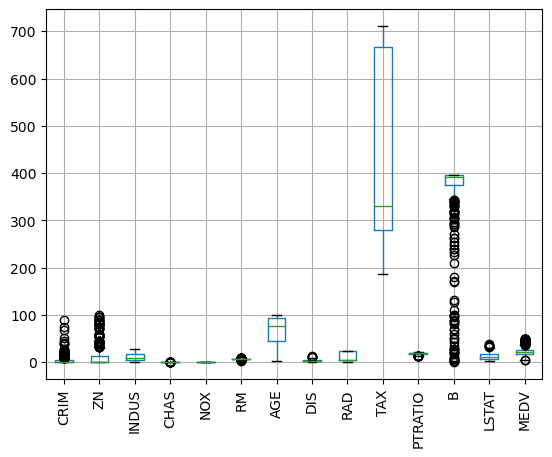

In [9]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

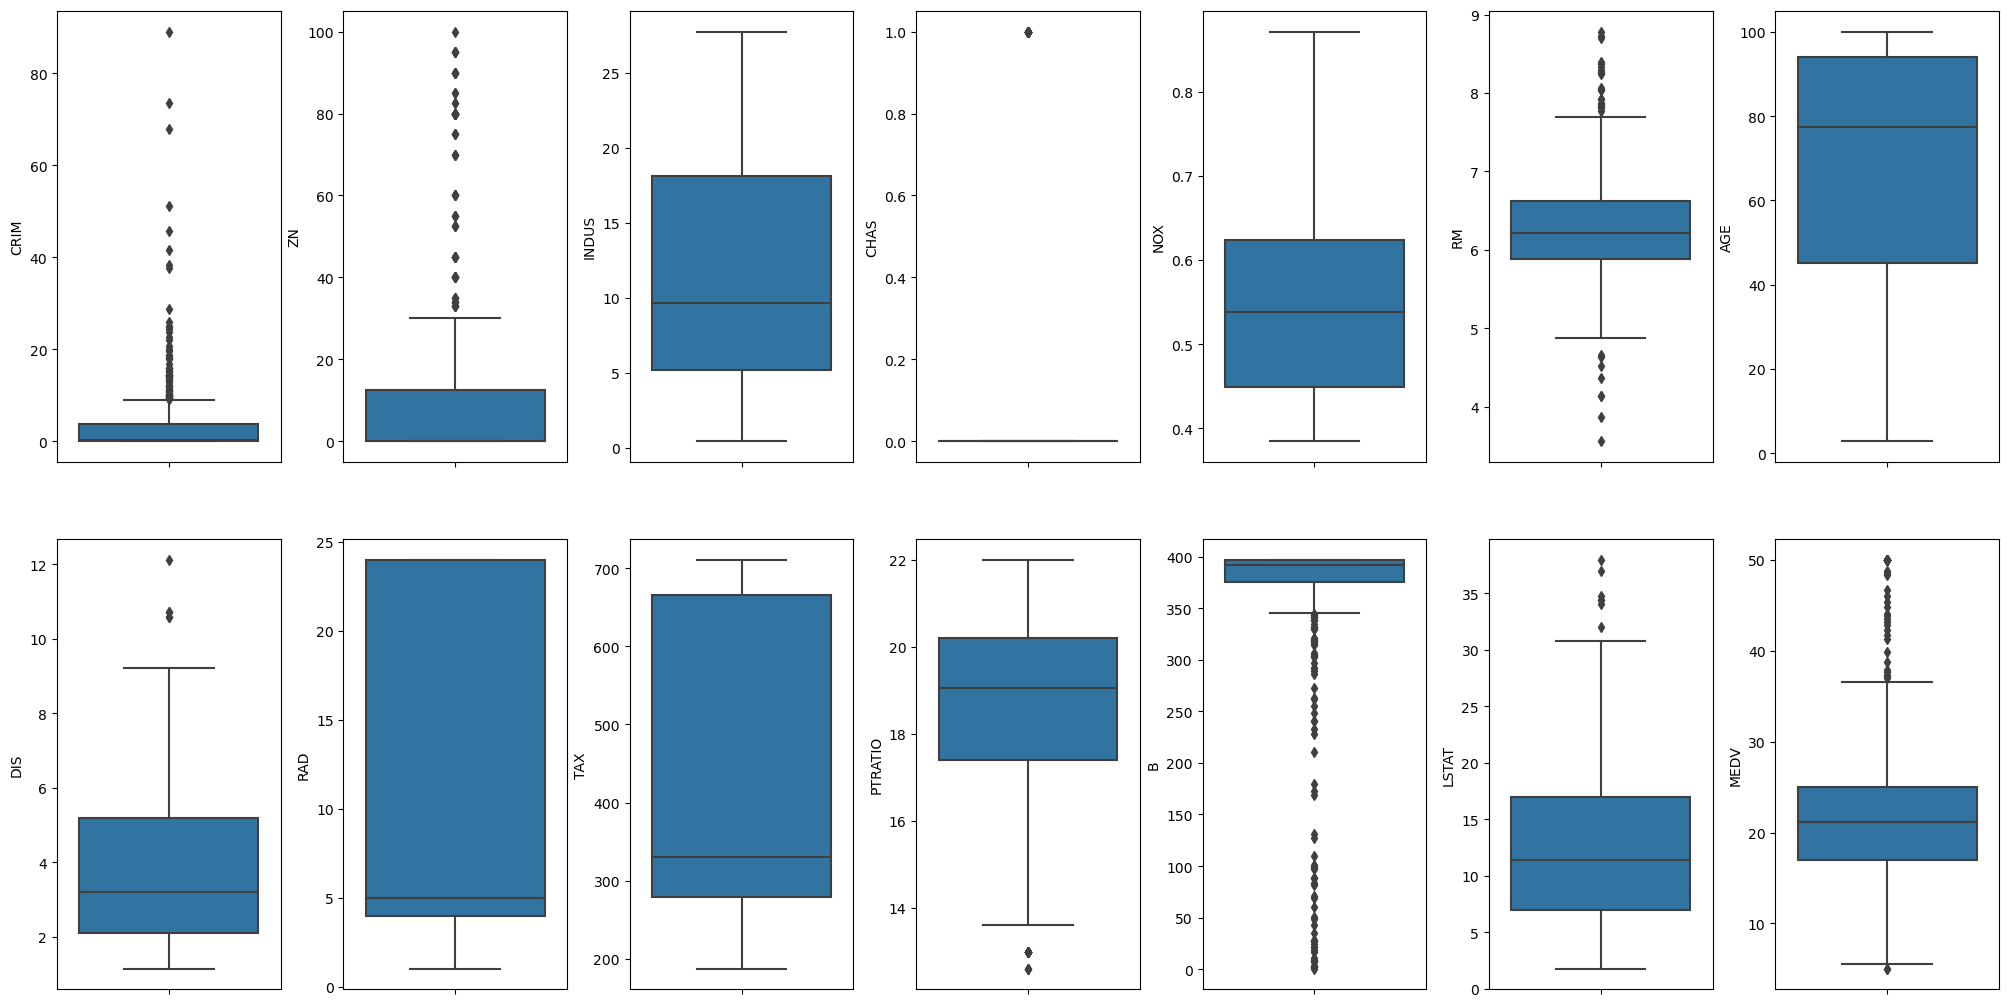

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

CRIM
5.207652387859715
ZN
2.219063057148425
INDUS
0.29414627684418543
CHAS
3.395799292642519
NOX
0.7271441597740319
RM
0.40241466802496245
AGE
-0.5971855948016143
DIS
1.0087787565152246
RAD
1.0018334924536951
TAX
0.6679682687237768
PTRATIO
-0.7999445320367449
B
-2.8817983452627716
LSTAT
0.9037707431346133
MEDV
1.104810822864635


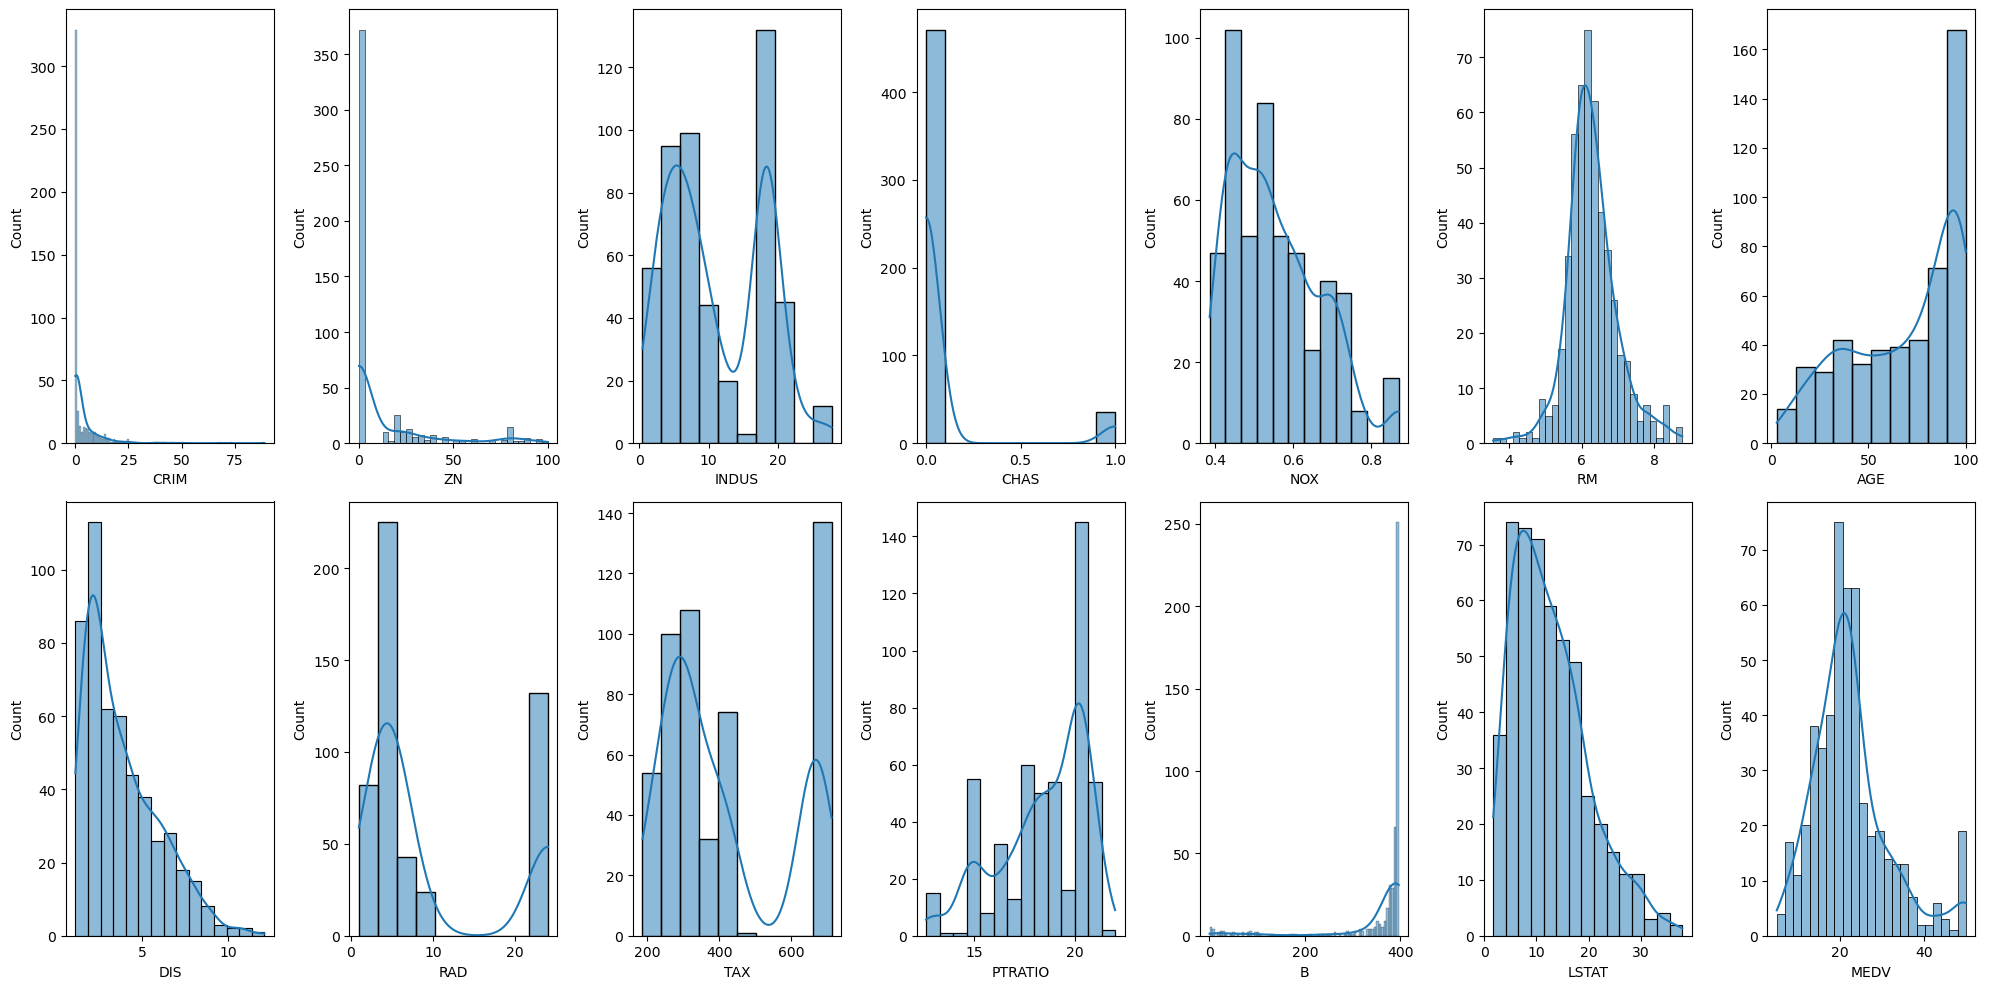

In [11]:
from scipy.stats import skew

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for col in df:
    print(col)
    print(skew(df[col]))

    sns.histplot(df[col], kde=True, ax=axs[index])
    index += 1

plt.tight_layout()  # To improve the layout of subplots
plt.show()

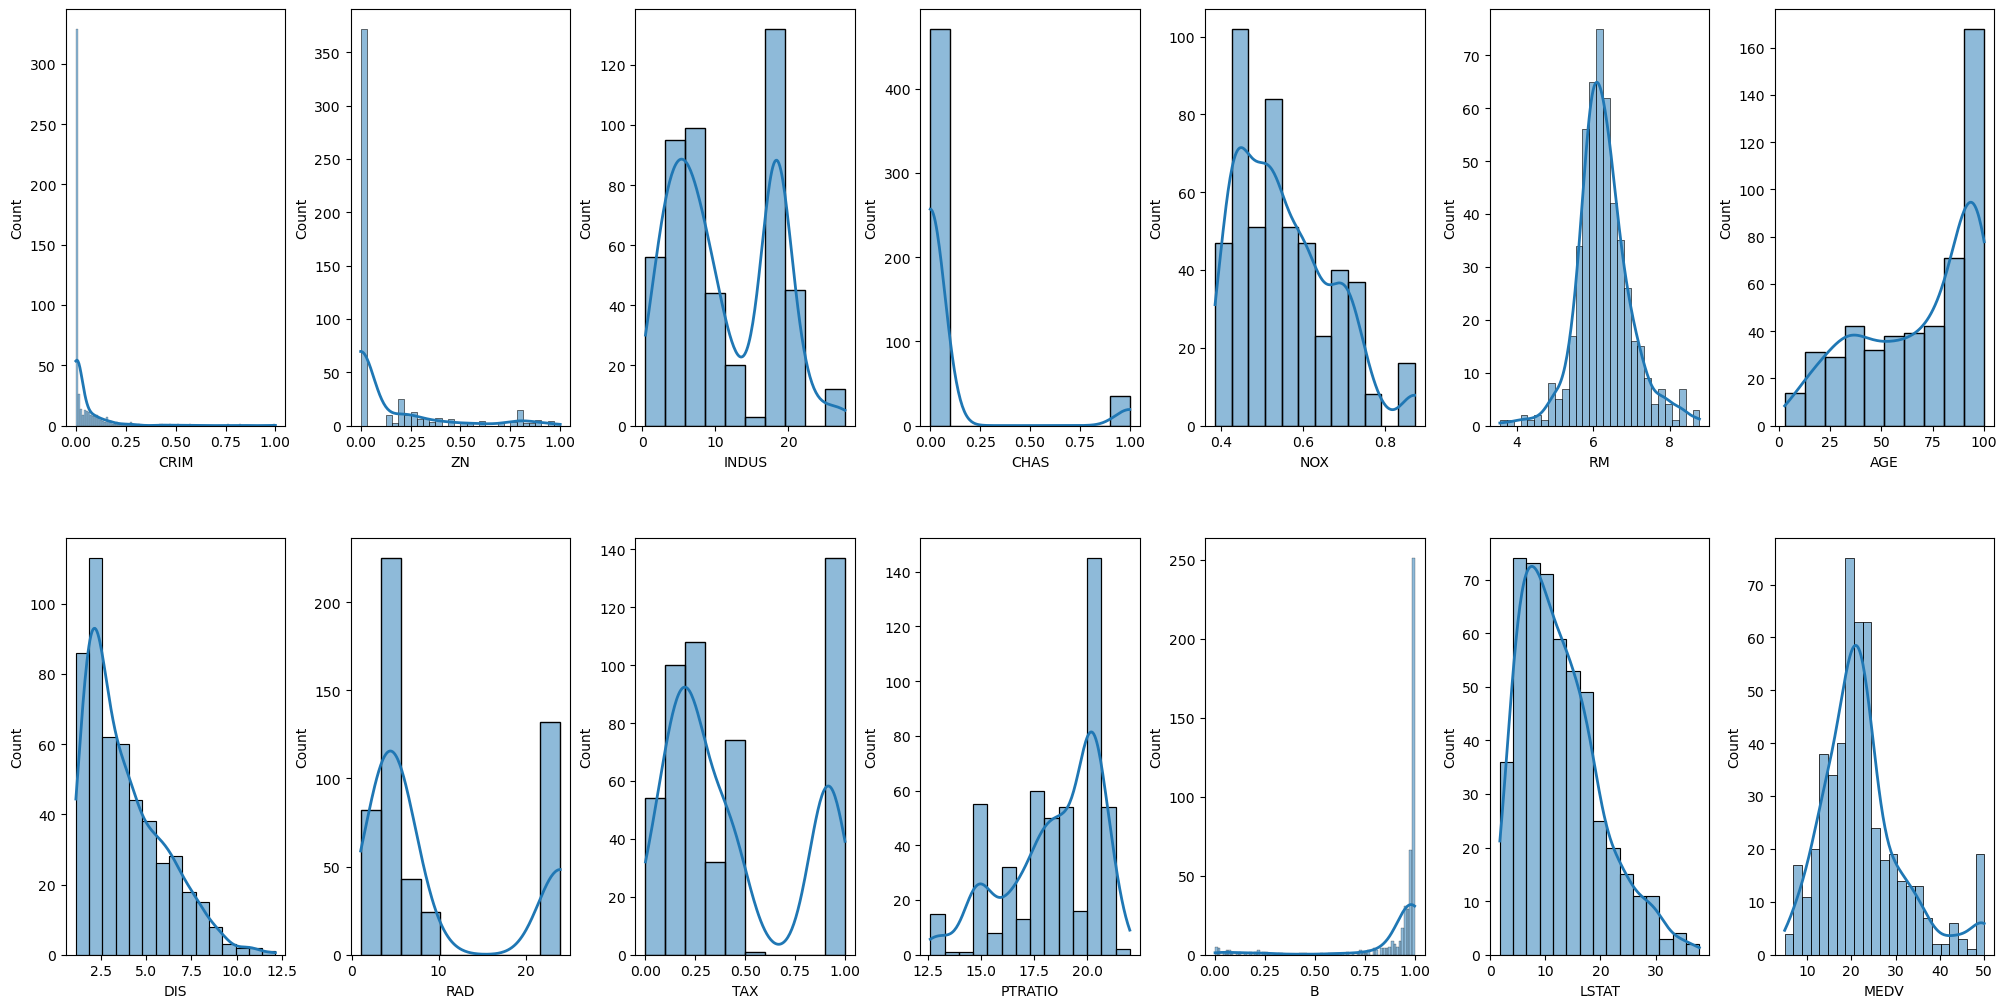

In [12]:
#Normalization of 'CRIM','B','ZN','TAX'

cols=['CRIM','B','ZN','TAX']

for col in cols:
    #let's find the minimum and maximum for these columns:
    minimum = min(df[col])
    maximum = max(df[col])
    #formula for MinMax Normalization:
    df[col] = (df[col] - minimum) / (maximum - minimum)


fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.histplot(v, ax=axs[index], kde=True, line_kws={'linewidth': 2})
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [13]:
#Standardization of 'CRIM','B','ZN','TAX'

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

#Now let's fit our data (the 4 columns in cols=['CRIM','B','ZN','TAX'])

scaled_cols = scaler.fit_transform(df[cols]) #Matrix structure of values without column names
scaled_cols = pd.DataFrame(scaled_cols, columns=cols) #Creating a dataframe with scaled_cols
scaled_cols.head()

CRIM         B        ZN       TAX
0 -0.419782  0.441052  0.284830 -0.666608
1 -0.417339  0.441052 -0.487722 -0.987329
2 -0.417342  0.396427 -0.487722 -0.987329
3 -0.416750  0.416163 -0.487722 -1.106115
4 -0.412482  0.441052 -0.487722 -1.106115

In [14]:
for col in cols:
    df[col] = scaled_cols[col]

df.head()

CRIM        ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD       TAX  \
0 -0.419782  0.284830   2.31     0  0.538  6.575  65.2  4.0900    1 -0.666608   
1 -0.417339 -0.487722   7.07     0  0.469  6.421  78.9  4.9671    2 -0.987329   
2 -0.417342 -0.487722   7.07     0  0.469  7.185  61.1  4.9671    2 -0.987329   
3 -0.416750 -0.487722   2.18     0  0.458  6.998  45.8  6.0622    3 -1.106115   
4 -0.412482 -0.487722   2.18     0  0.458  7.147  54.2  6.0622    3 -1.106115   

   PTRATIO         B  LSTAT  MEDV  
0     15.3  0.441052   4.98  24.0  
1     17.8  0.441052   9.14  21.6  
2     17.8  0.396427   4.03  34.7  
3     18.7  0.416163   2.94  33.4  
4     18.7  0.441052   5.33  36.2

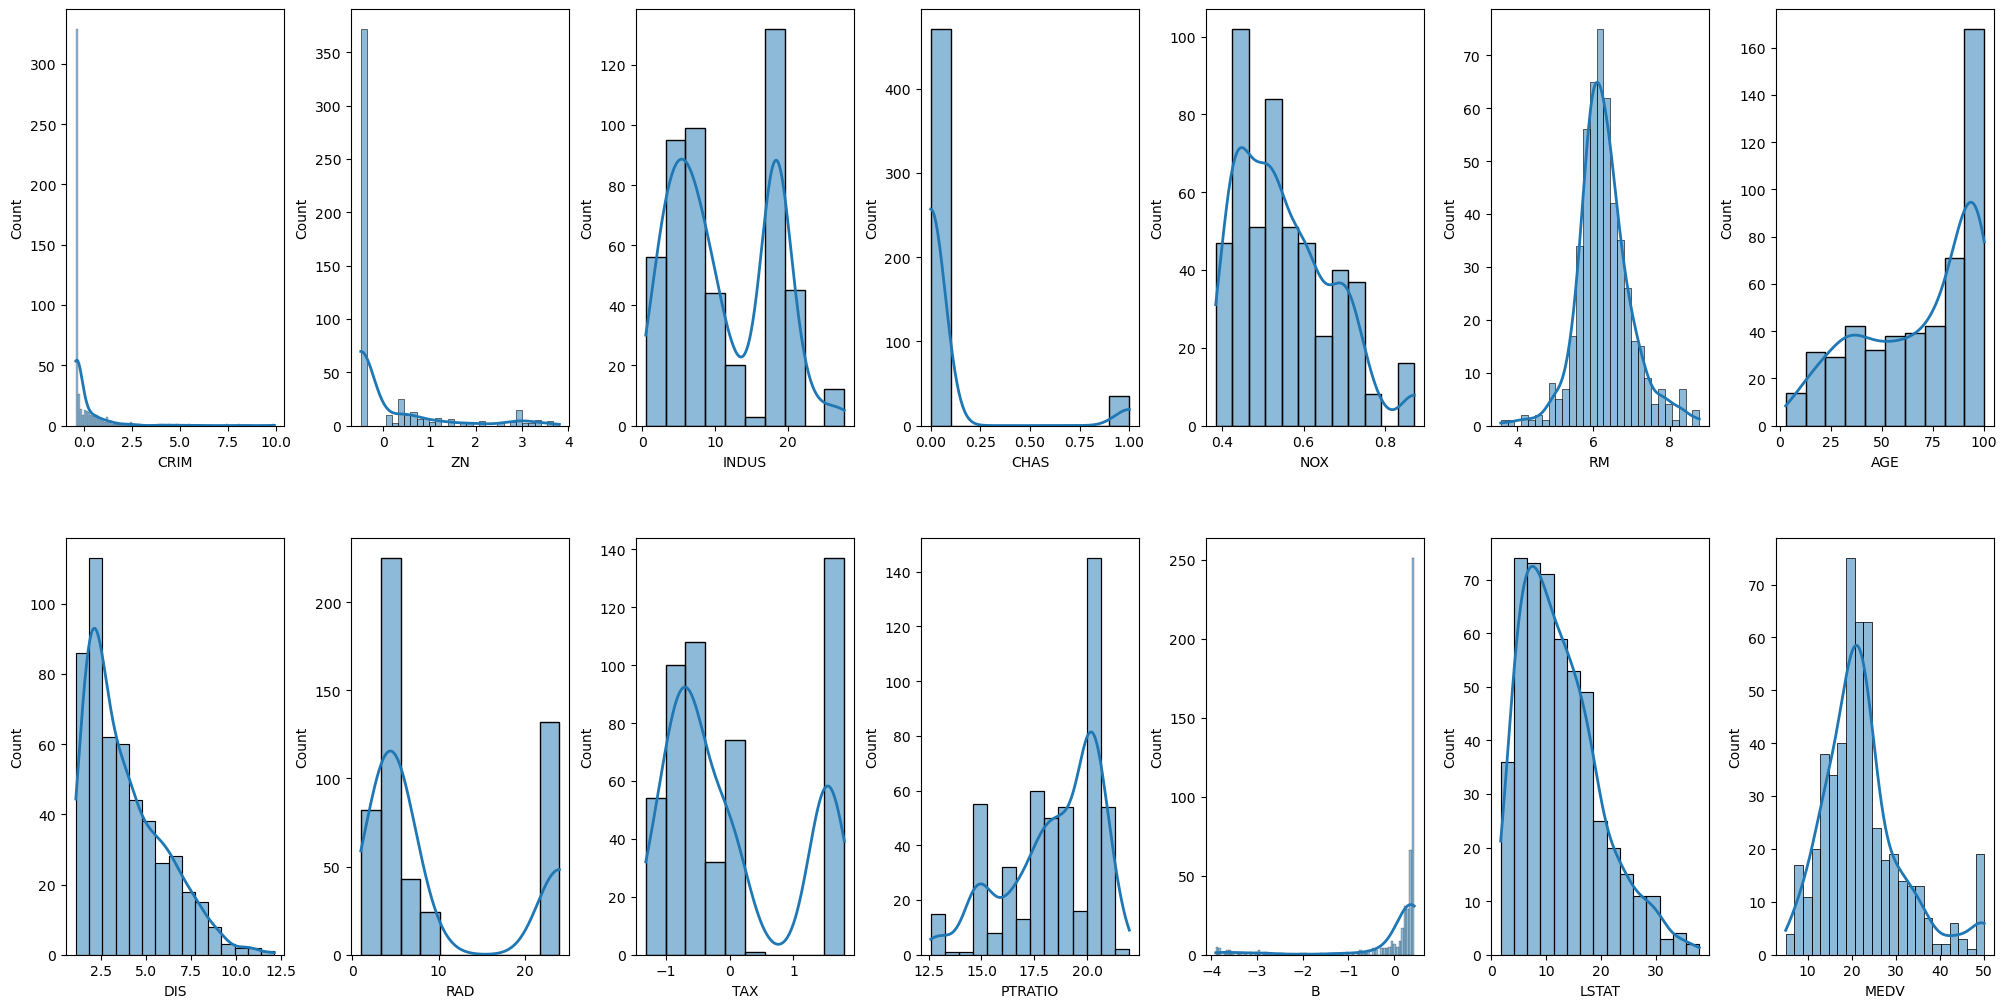

In [15]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.histplot(v, ax=axs[index], kde=True, line_kws={'linewidth': 2})
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

We have applied standardization to 'CRIM','B','ZN','TAX'.

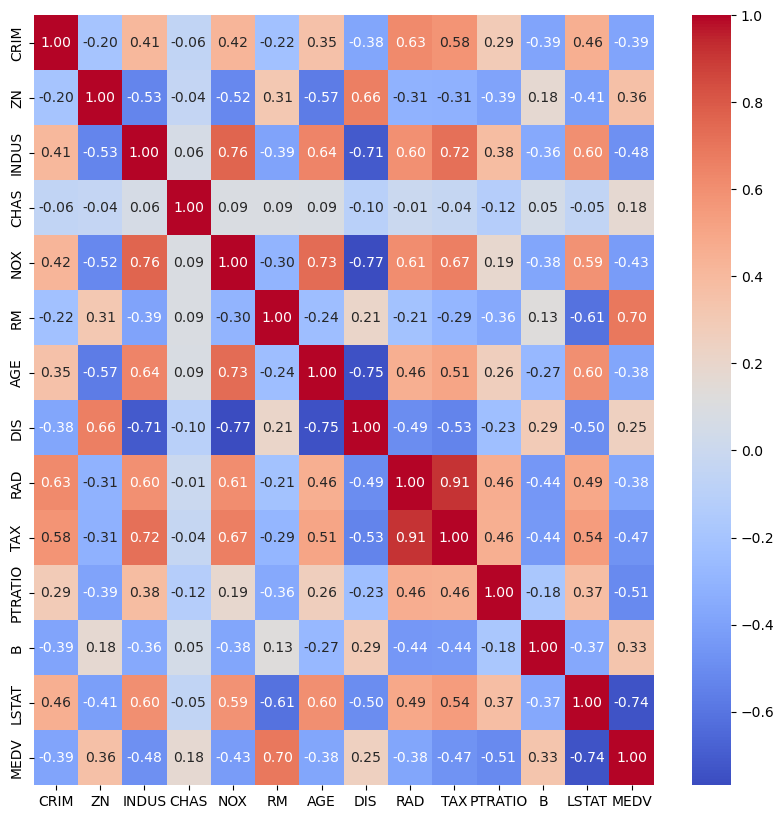

In [16]:
df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

<Figure size 400x400 with 0 Axes>

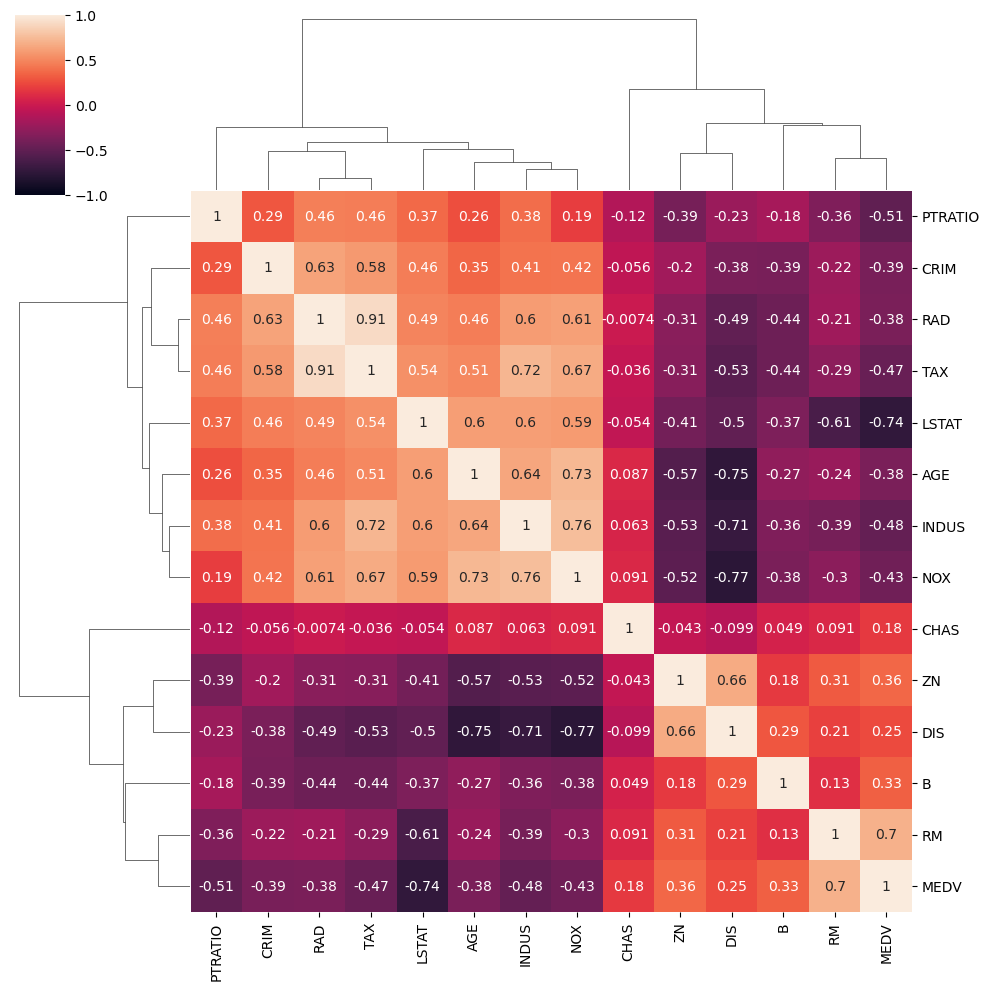

In [17]:
plt.figure(figsize = (4, 4))
clustermap = sns.clustermap(df.corr(), vmin = -1, vmax = 1, annot = True)
plt.show()

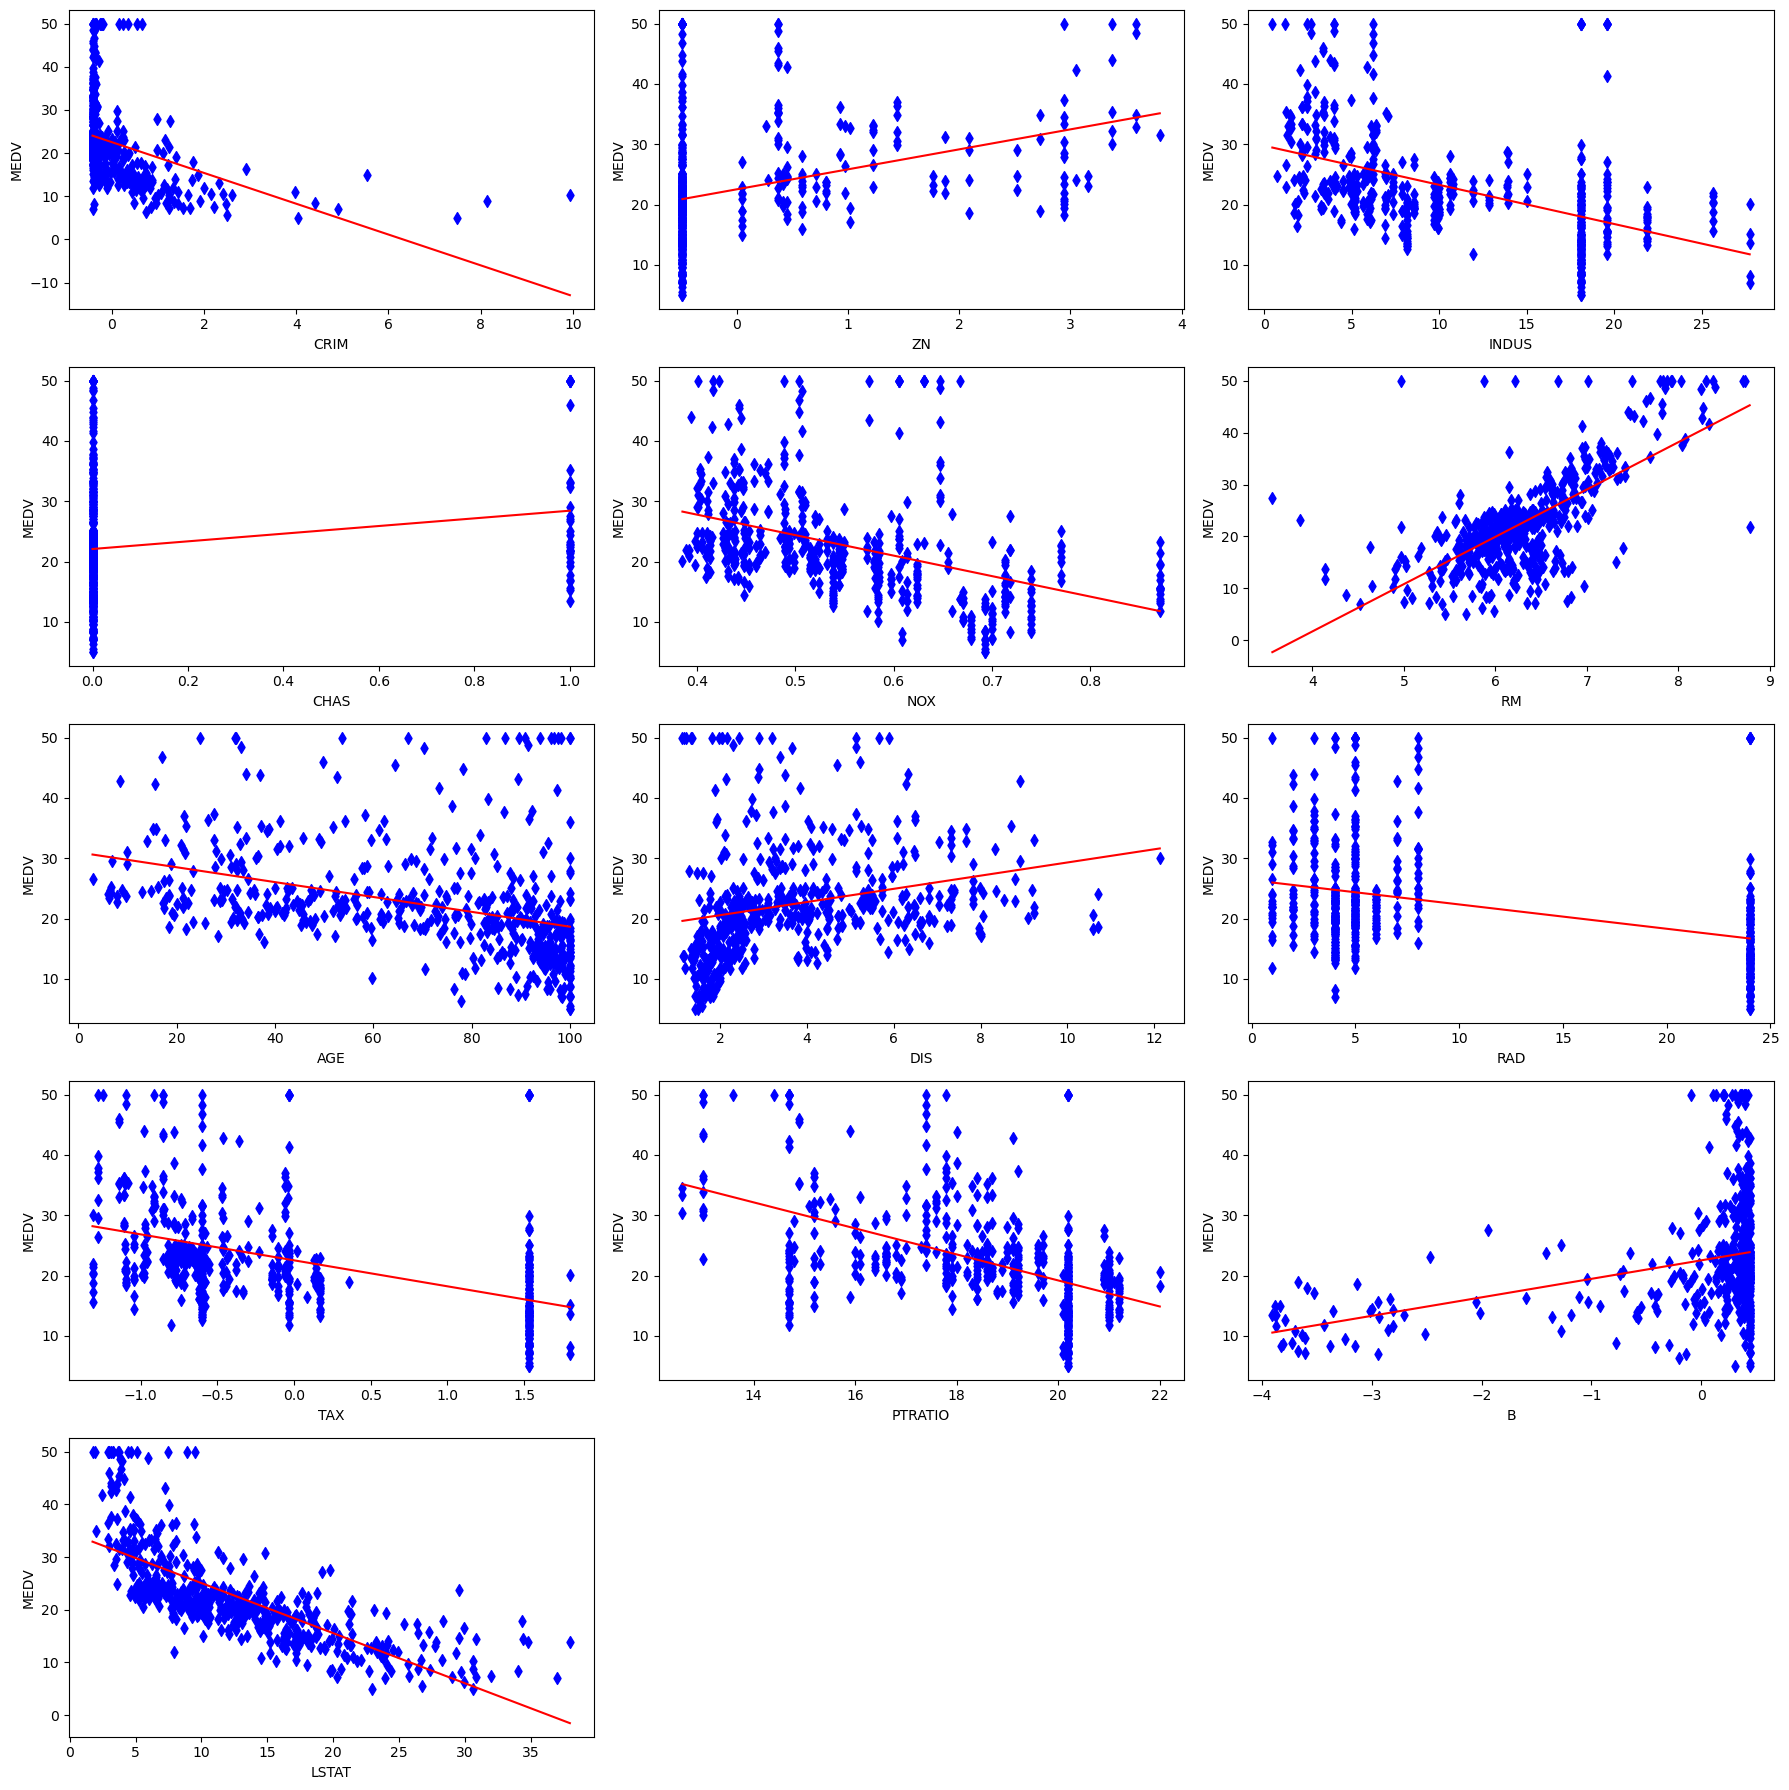

In [18]:
plt.figure(figsize=(18, 18))

for i, idx in enumerate(df.columns[0:13]):
    plt.subplot(5, 3, i+1)
    x = df[idx]
    y = df['MEDV']
    plt.scatter(x, y, color='blue', marker='d')  # Scatterplot in blue
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.xlabel(idx)
    plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

In [19]:
X = df.drop(columns = ['MEDV', 'RAD'], axis=1)
y = df['MEDV']

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 12), (152, 12), (354,), (152,))

In [21]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
#DTR model: evaluation on Train data

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

y_pred_dtr_tr = dtr.predict(X_train)

print("MSE",round(mean_squared_error(y_train, y_pred_dtr_tr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_train ,y_pred_dtr_tr)), 3))
print("MAE",round(mean_absolute_error(y_train ,y_pred_dtr_tr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_train, y_pred_dtr_tr), 3))
print("R2 Score : ", round(r2_score(y_train, y_pred_dtr_tr), 3))

MSE 0.0
RMSE 0.0
MAE 0.0
MAPE 0.0
R2 Score :  1.0


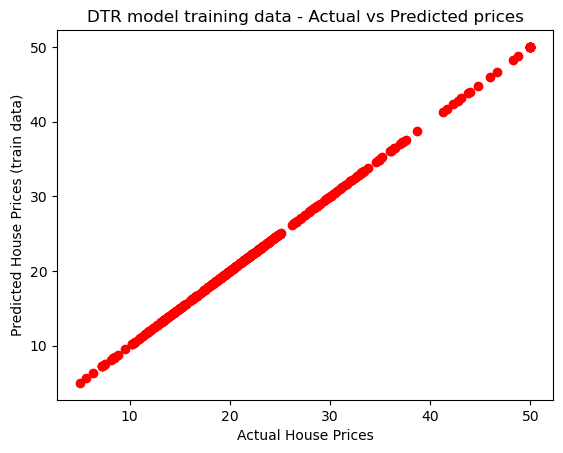

In [23]:
plt.scatter(y_train, y_pred_dtr_tr, color='r')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (train data)")
plt.title("DTR model training data - Actual vs Predicted prices")
plt.show()

In [24]:
#DTR model: evaluation on Testing data (predictions)

y_pred_dtr = dtr.predict(X_test)

print("MSE",round(mean_squared_error(y_test,y_pred_dtr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred_dtr)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred_dtr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred_dtr), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred_dtr), 3))

MSE 19.34
RMSE 4.398
MAE 2.702
MAPE 0.15
R2 Score :  0.74


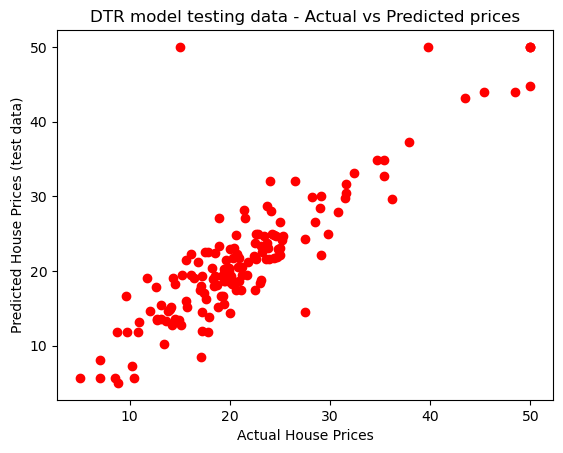

In [25]:
plt.scatter(y_test, y_pred_dtr, color='r')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (test data)")
plt.title("DTR model testing data - Actual vs Predicted prices")
plt.show()

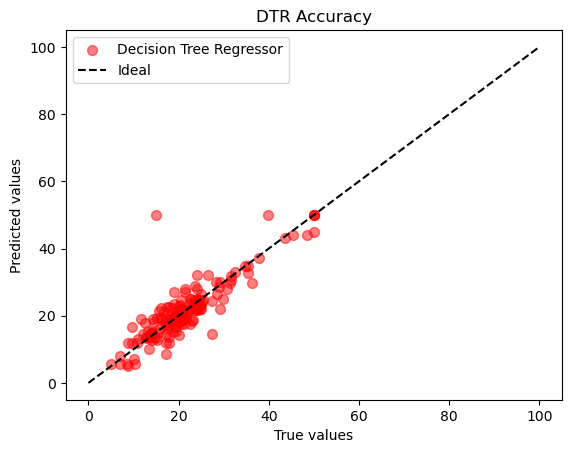

In [26]:
#Another visualization of our DTR model predictions from the test set:

plt.scatter(y_test, y_pred_dtr, label='Decision Tree Regressor', color='r', alpha=0.5, s=50)
plt.plot([0, 100], [0, 100], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('DTR Accuracy')
plt.legend()
plt.show()

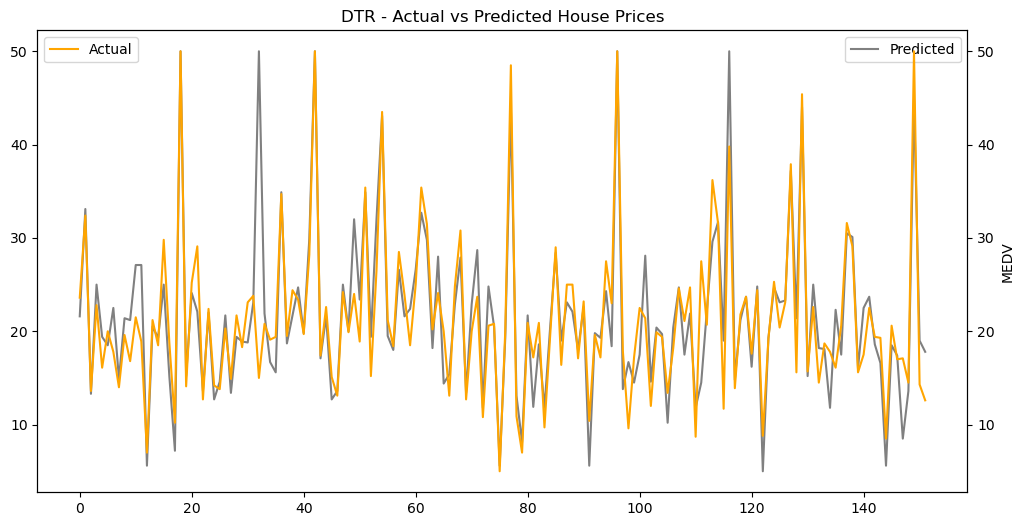

In [27]:
data_points = list(range(len(y_test)))

fig = plt.figure(figsize=(12, 6))
plt.title('DTR - Actual vs Predicted House Prices')

fig = sns.lineplot(x=data_points, 
                   y=y_pred_dtr, 
                   color="grey", 
                   legend='brief', 
                   label = "Predicted")
ax2 = plt.twinx()
fig = sns.lineplot(x=data_points, 
                   y=y_test, 
                   color="orange", 
                   legend='brief', 
                   label = "Actual",
                   ax=ax2)
plt.show()

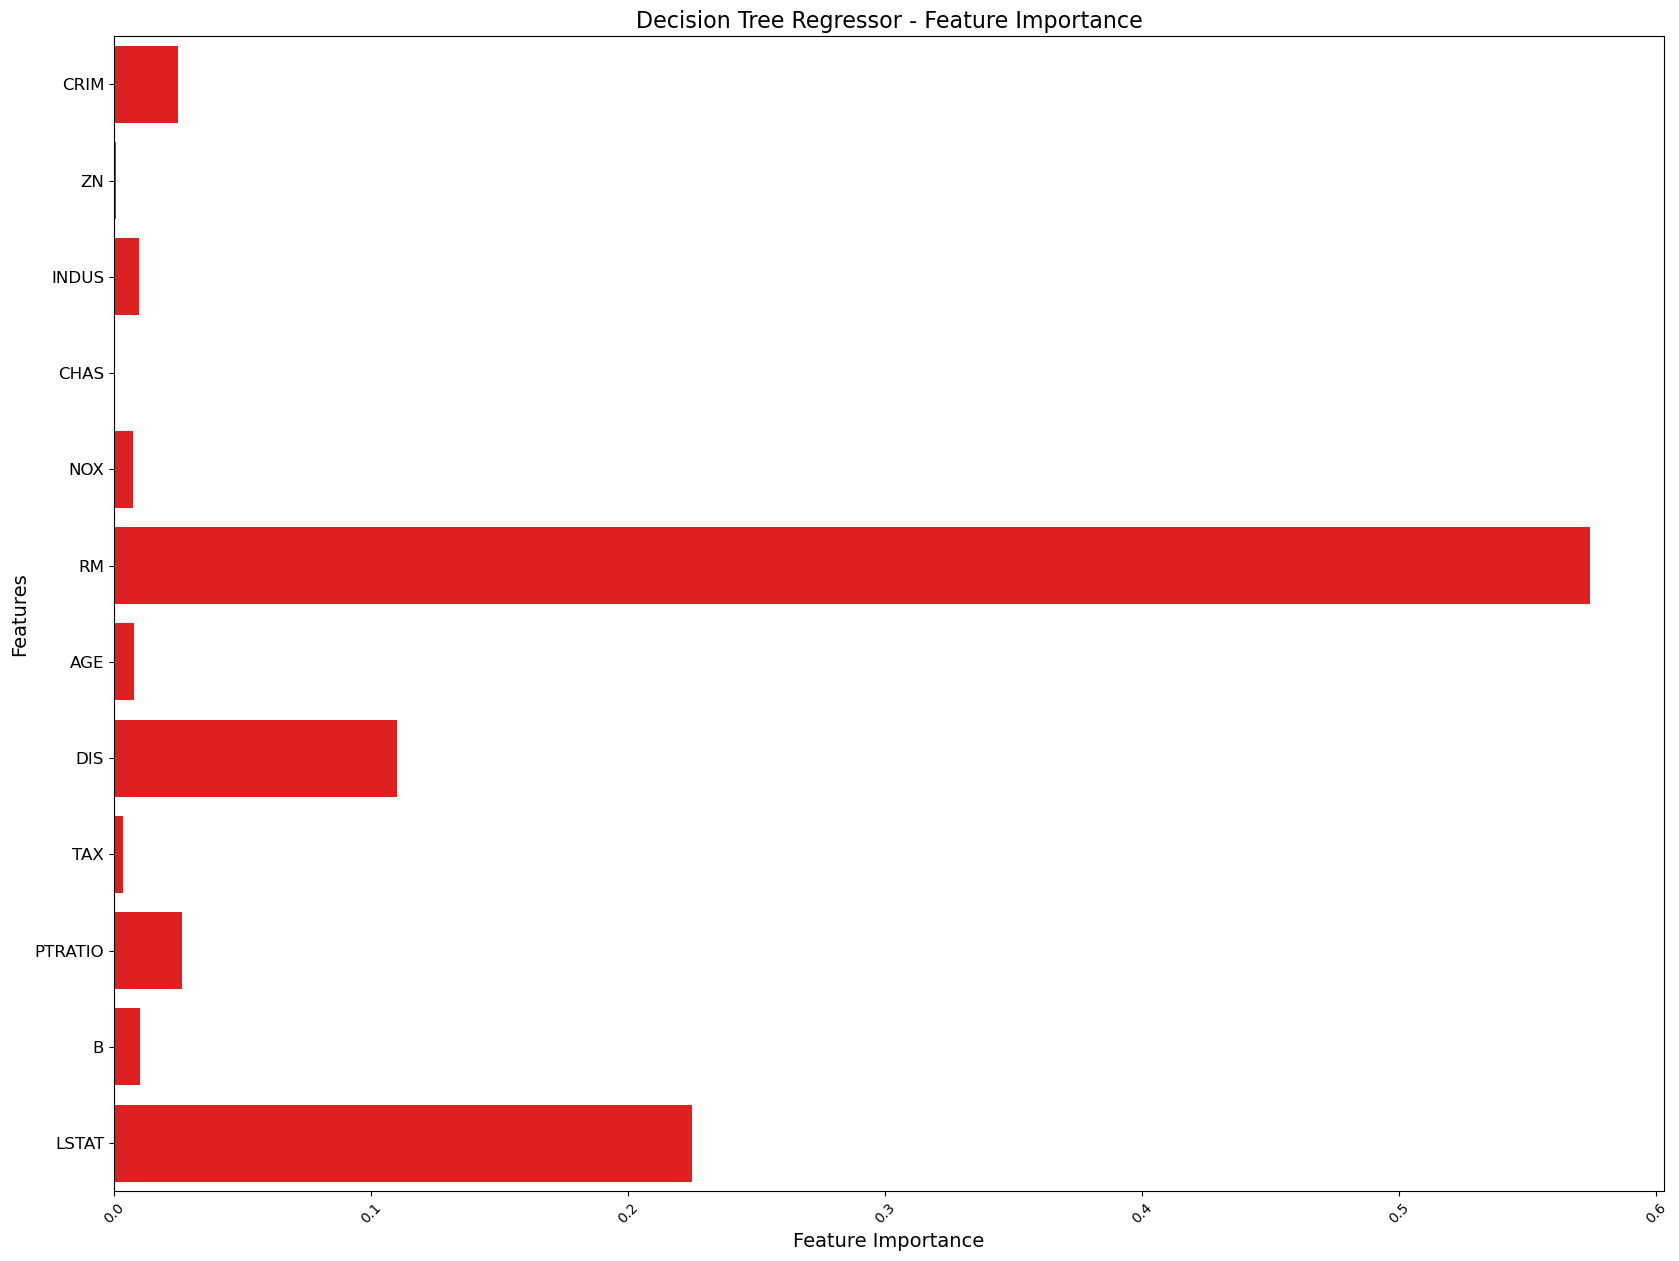

In [28]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=dtr.feature_importances_, y=X.columns, ax=ax, color='r')
ax.set_xlabel('Feature Importance', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.set_title('Decision Tree Regressor - Feature Importance', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def train(model, X, y):
    # Train the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict the test data
    y_pred = model.predict(X_test)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_scores))
    
    # Model R2 score on train data
    r2_train = r2_score(y_train, model.predict(X_train))
    
    # Model R2 score on test data
    r2_test = r2_score(y_test, y_pred)
    
    # Model MAPE score
    MAPE = mean_absolute_percentage_error(y_test, y_pred)

    # Print model report
    print("Model report")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("Cross Validation score:", cv_score)
    print("Model R2 score on train data:", r2_train)
    print("Model R2 score on test data:", r2_test)
    print("MAPE:", MAPE)

    # Scatter plot comparing train predictions against test predictions
    plt.scatter(model.predict(X_train), y_train, color='b', label='Train')
    plt.scatter(y_pred, y_test, color='r', label='Test')
    plt.xlabel("Predicted House Prices")
    plt.ylabel("Actual House Prices")
    plt.title("Model Train vs test - Predicted vs Actual prices")
    plt.legend()
    plt.show()
    
    # Accuracy visualization
    plt.scatter(y_test, y_pred, label = model , alpha=0.5, s=50)
    plt.plot([0, 100], [0, 100], 'k--', label='Ideal')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

    # Line plot comparing predictions against true values
    data_points = list(range(len(y_test)))
    fig = plt.figure(figsize=(12, 6))
    plt.title('Model - Actual vs Predicted House Prices')
    fig = sns.lineplot(x=data_points, 
                       y=y_pred, 
                       color="grey", 
                       legend='brief', 
                       label="Predicted")
    ax2 = plt.twinx()
    fig = sns.lineplot(x=data_points, 
                       y=y_test, 
                       color="orange", 
                       legend='brief', 
                       label="Actual",
                       ax=ax2)
    plt.show()

Model report
MSE: 23.871005067364916
Cross Validation score: 35.581366210769175
Model R2 score on train data: 0.7406684337042502
Model R2 score on test data: 0.6591178245793914
MAPE: 0.1701676988070505


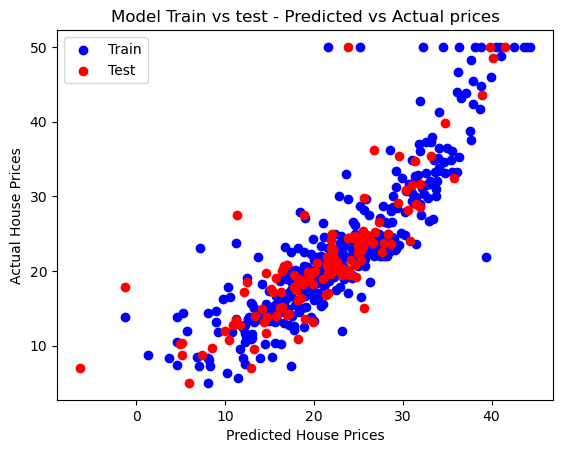

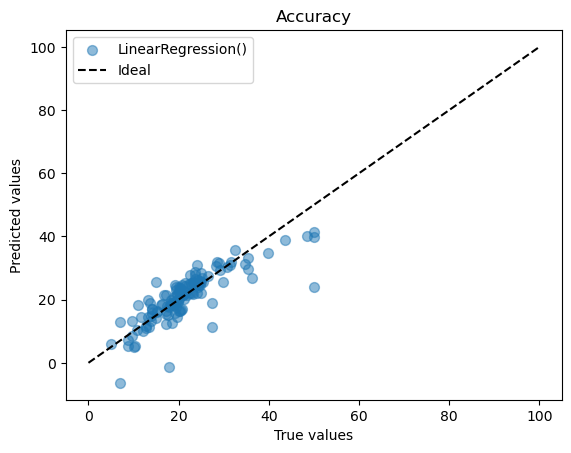

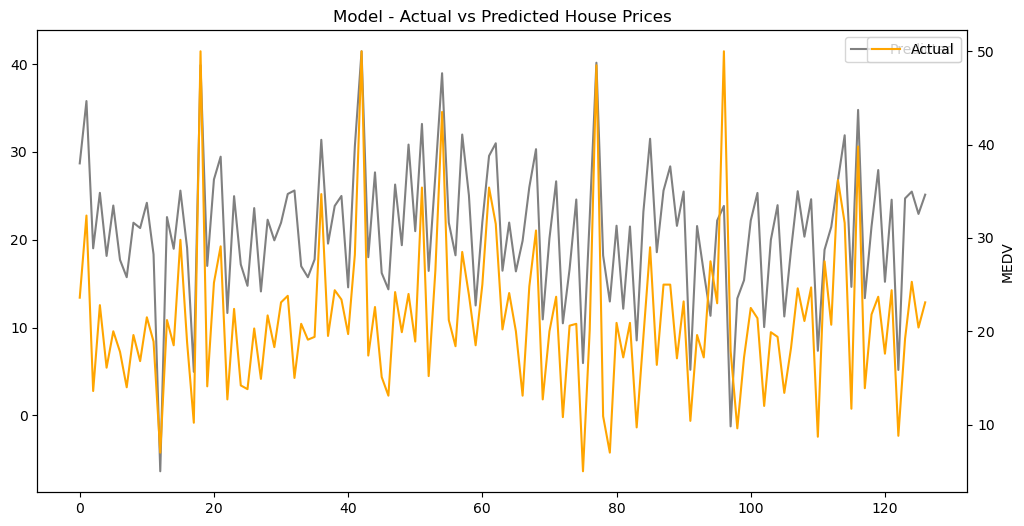

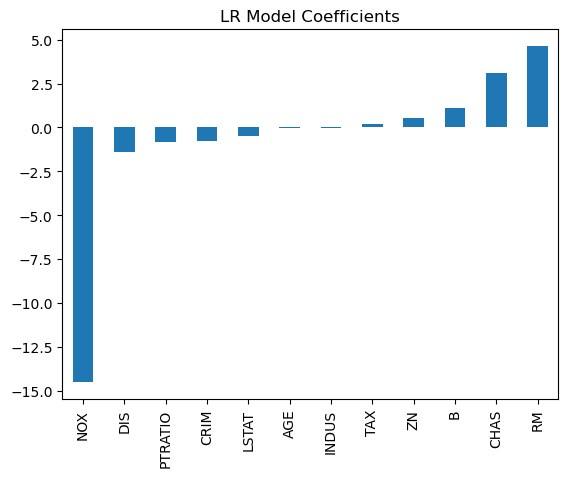

In [30]:
#Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
train (model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'LR Model Coefficients')
plt.show()

Model report
MSE: 10.658267716535432
Cross Validation score: 43.19092195690157
Model R2 score on train data: 1.0
Model R2 score on test data: 0.8477980514362605
MAPE: 0.14150775066837565


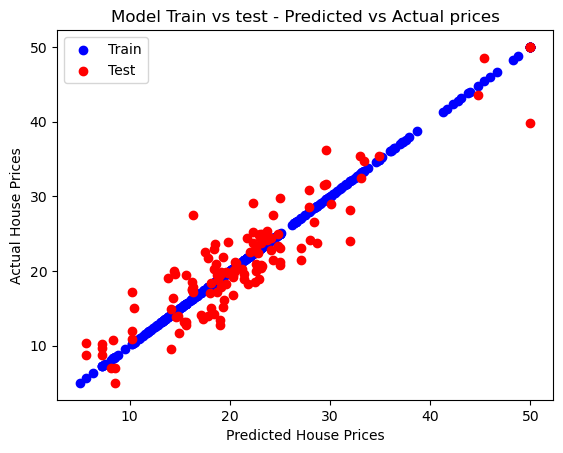

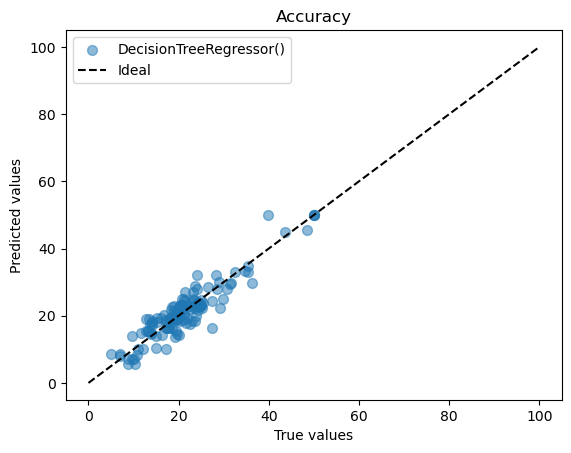

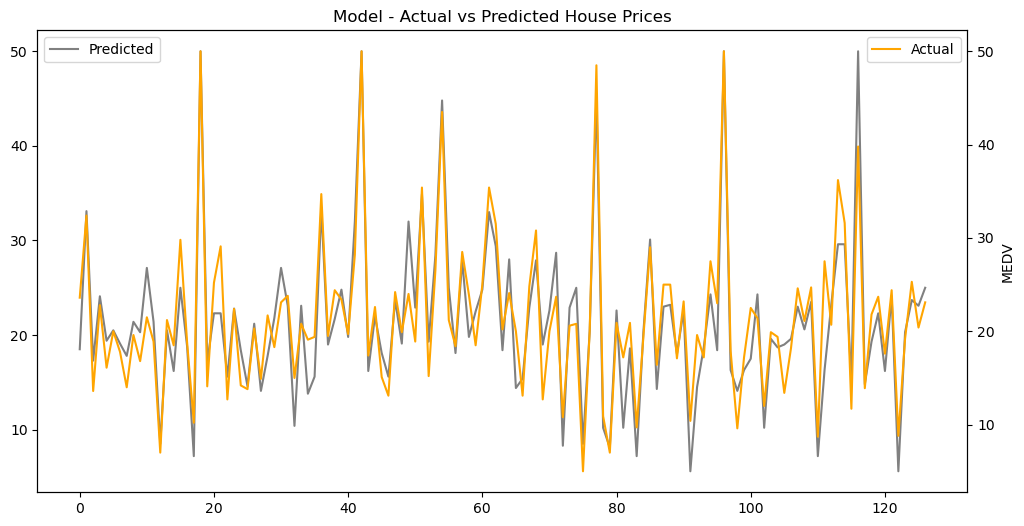

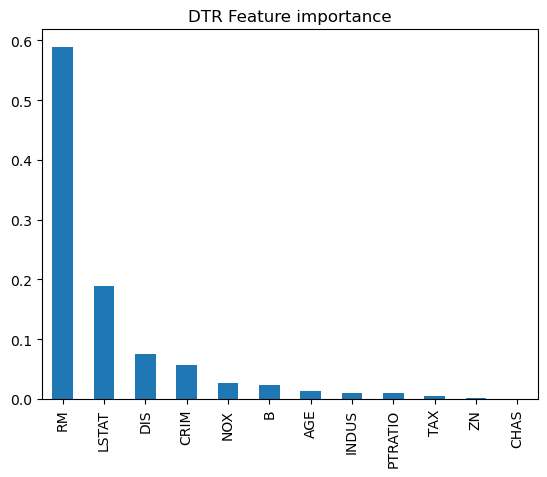

In [31]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train (model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind = 'bar', title = 'DTR Feature importance')
plt.show()

Model report
MSE: 10.399707472440946
Cross Validation score: 21.144072363599285
Model R2 score on train data: 0.9797596726120184
Model R2 score on test data: 0.8514903374642464
MAPE: 0.11014394461320795


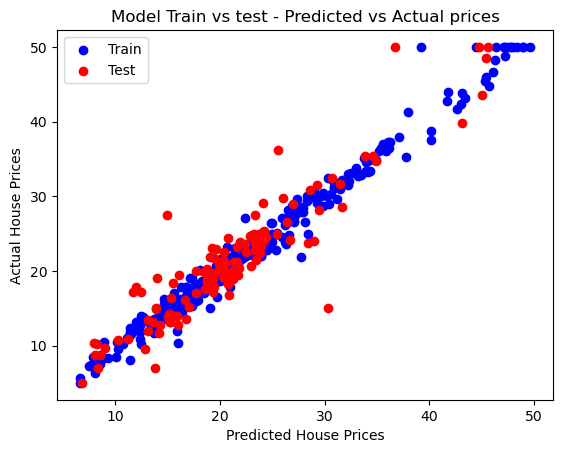

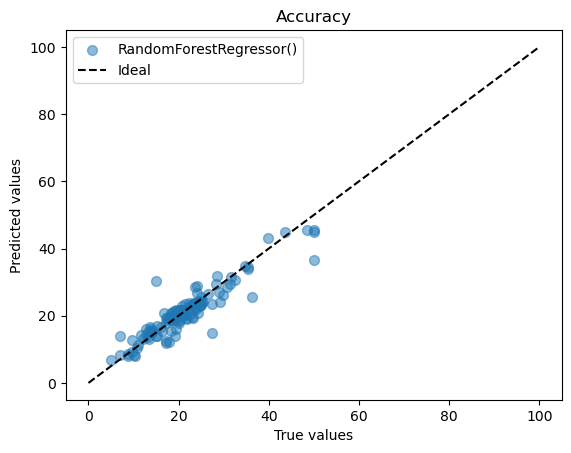

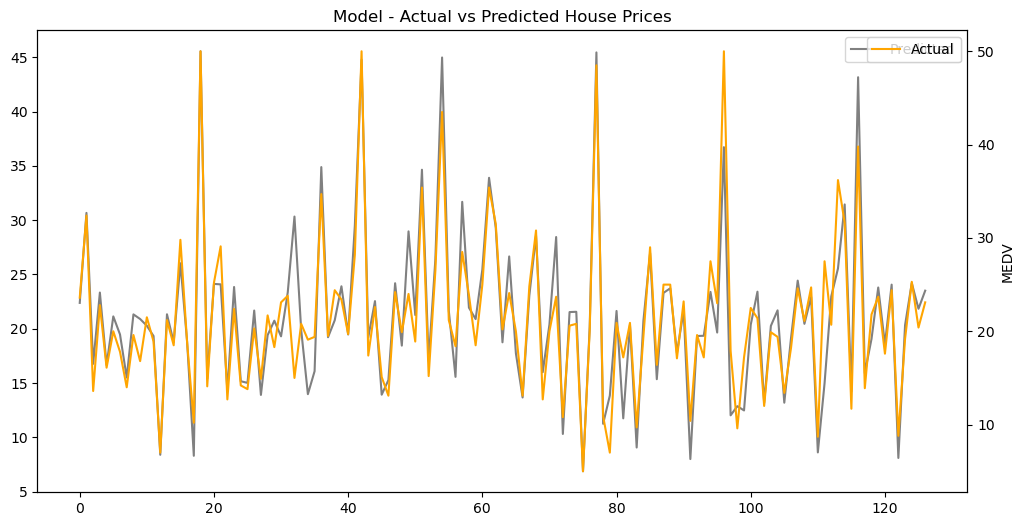

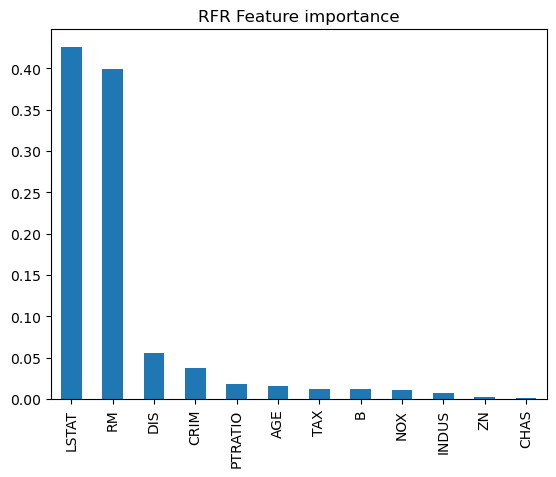

In [32]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train (model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind = 'bar', title = 'RFR Feature importance')
plt.show()

Model report
MSE: 10.229776363874551
Cross Validation score: 18.766198044819188
Model R2 score on train data: 0.9999951539215752
Model R2 score on test data: 0.8539169837573655
MAPE: 0.11003728301765614


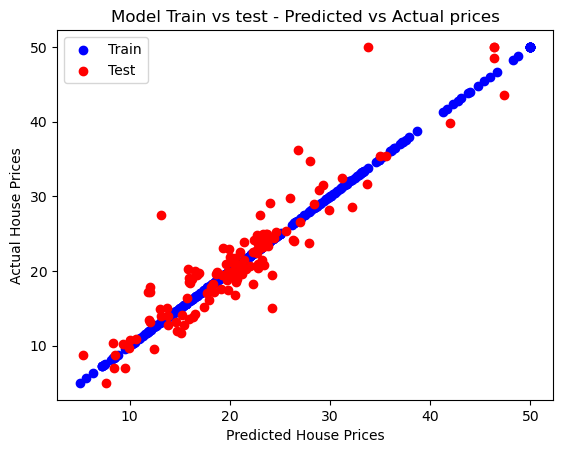

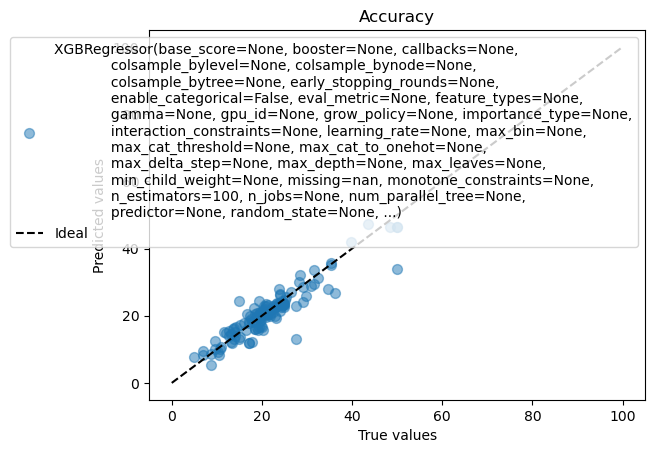

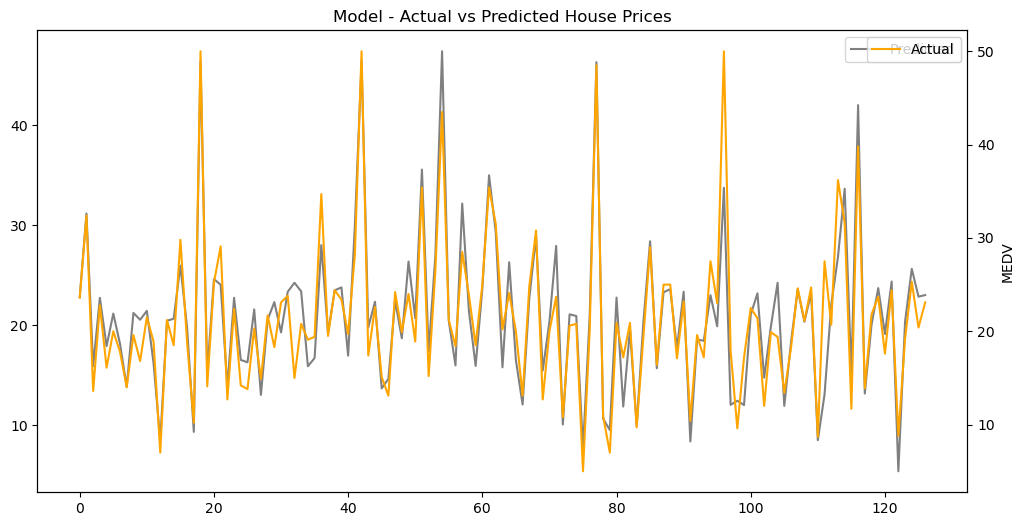

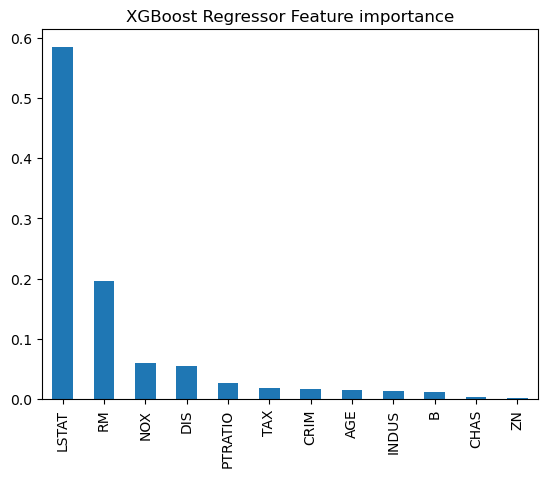

In [33]:
#XGBoost Regressor

from xgboost import XGBRegressor
model = XGBRegressor()
train (model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind = 'bar', title = 'XGBoost Regressor Feature importance')
plt.show()

Model report
MSE: 11.305758535433071
Cross Validation score: 19.673840748010075
Model R2 score on train data: 1.0
Model R2 score on test data: 0.83855176799374
MAPE: 0.10057187084625752


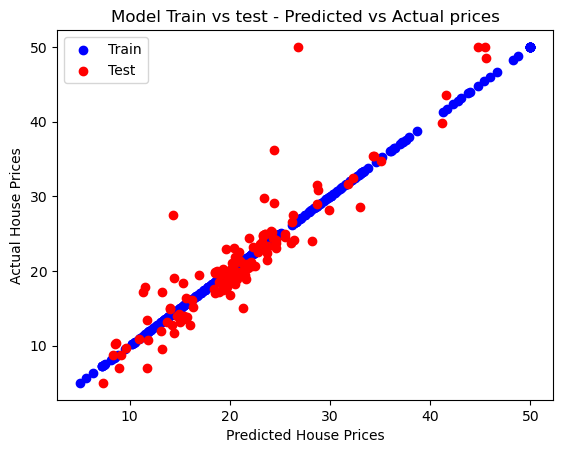

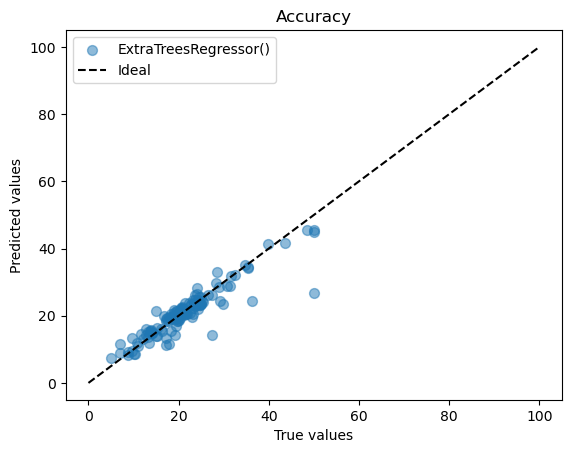

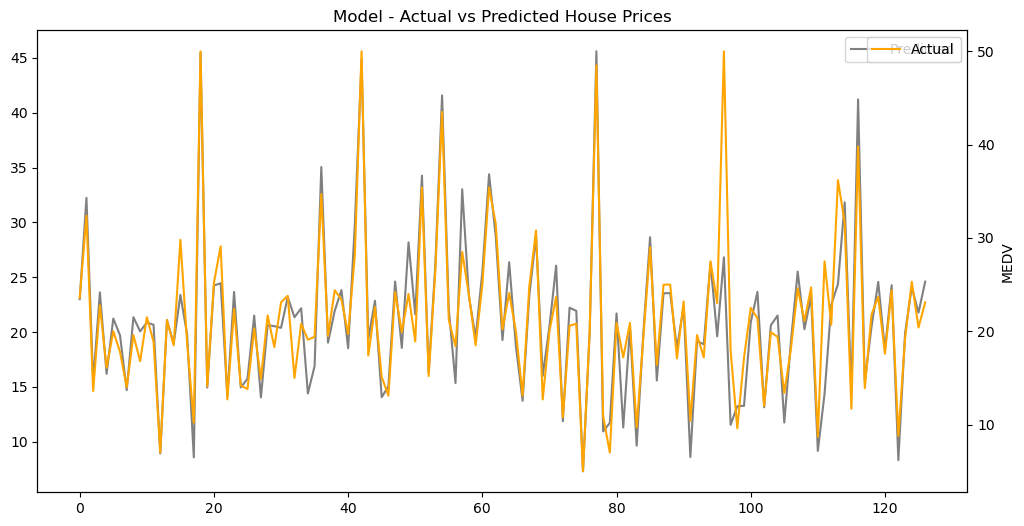

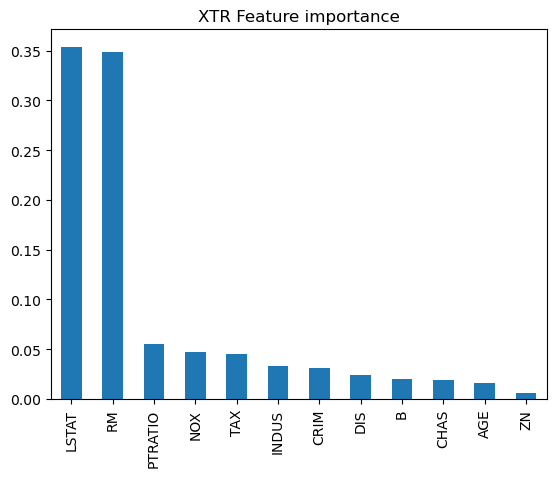

In [34]:
#Extra Trees Regressor

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train (model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind = 'bar', title = 'XTR Feature importance')
plt.show()

Model report
MSE: 25.482223537721683
Cross Validation score: 37.63520549719236
Model R2 score on train data: 0.6654973704216648
Model R2 score on test data: 0.636109339779396
MAPE: 0.18202120146587628


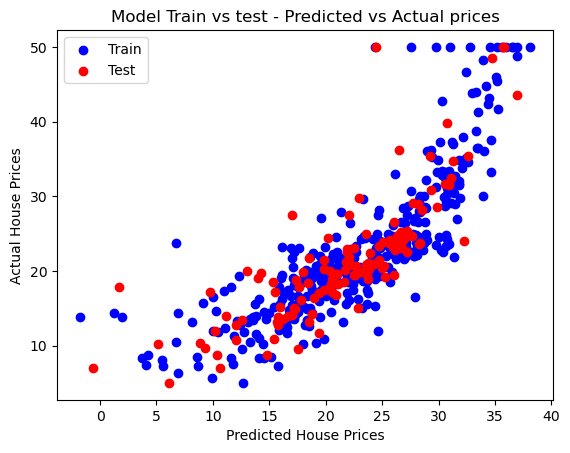

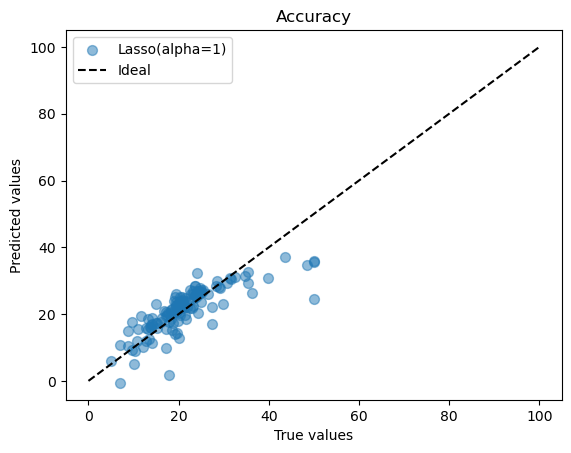

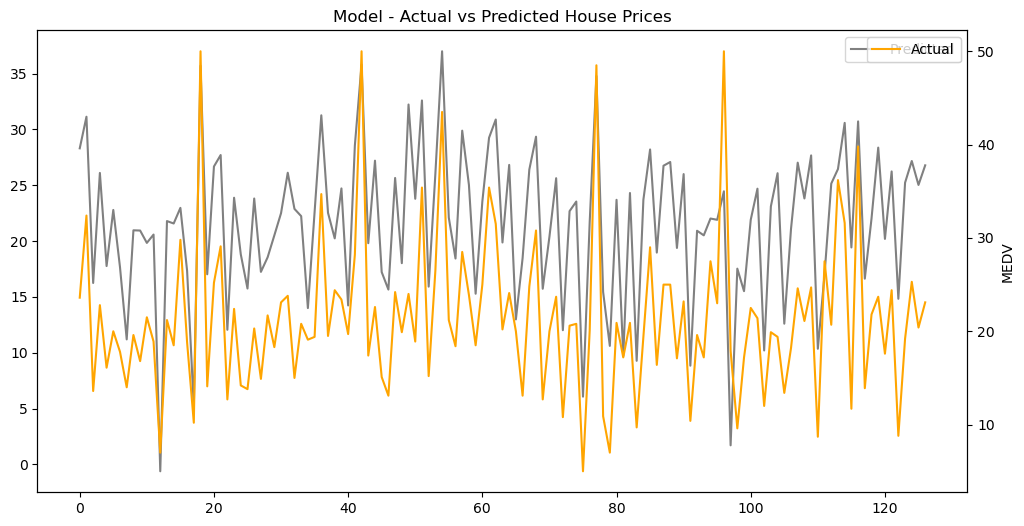

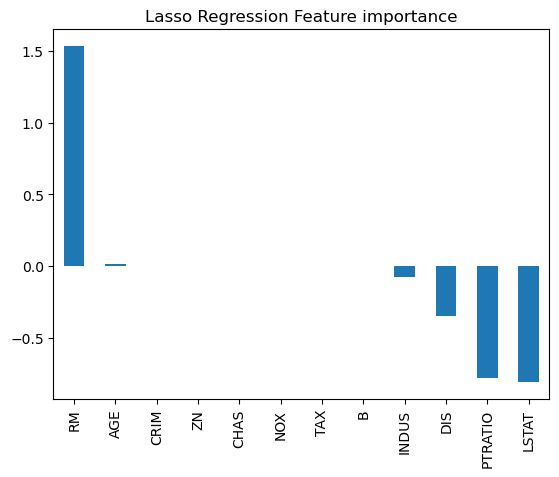

In [35]:
#Lasso Regression

from sklearn.linear_model import Lasso

model = Lasso(alpha = 1)
train (model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values(ascending=False)
coef.plot(kind = 'bar', title = 'Lasso Regression Feature importance')
plt.show()

Model report
MSE: 24.070714693803982
Cross Validation score: 34.605498021398645
Model R2 score on train data: 0.7390857852996959
Model R2 score on test data: 0.6562659357828842
MAPE: 0.16870913760250408


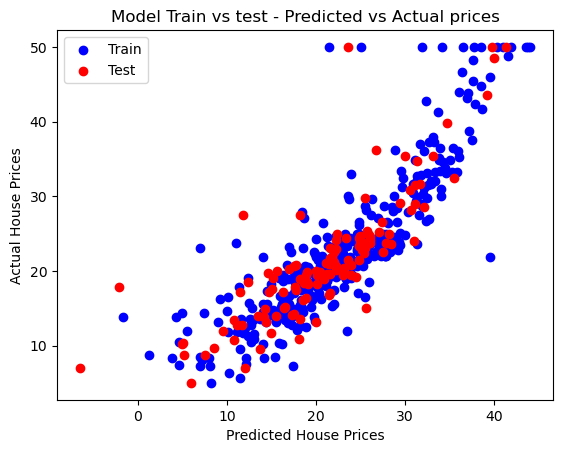

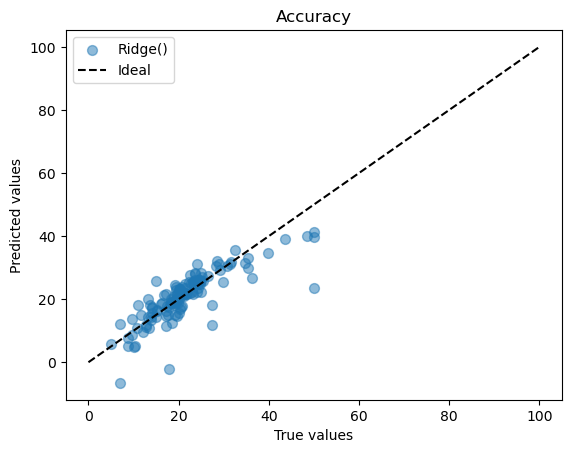

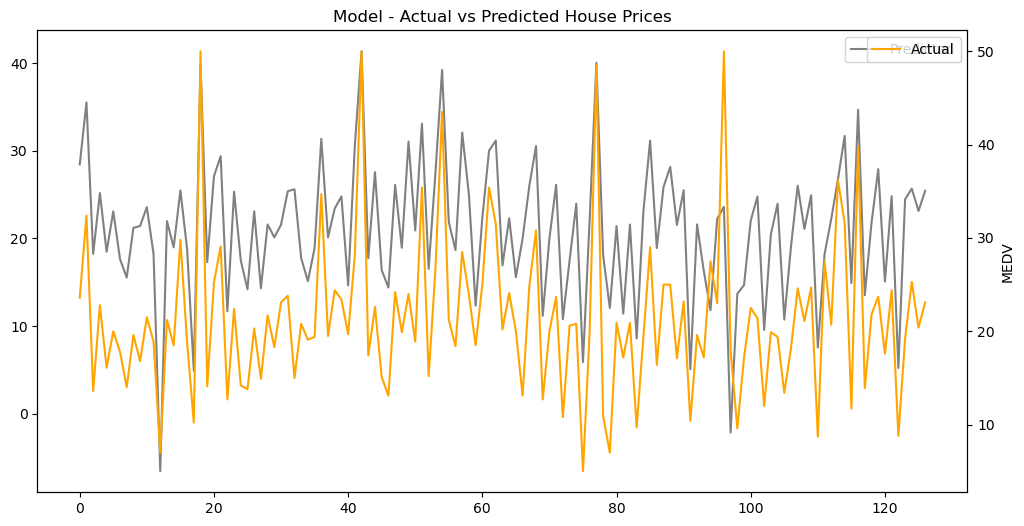

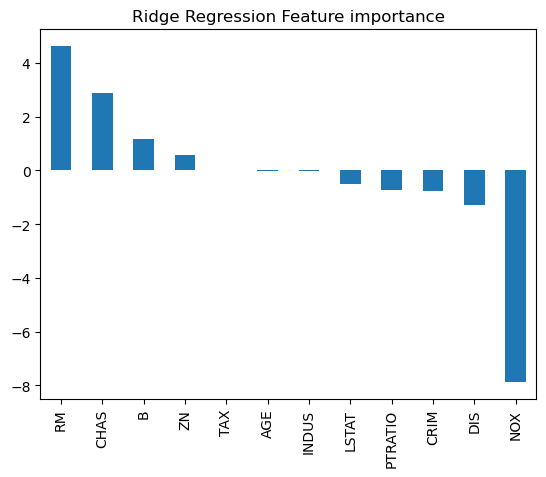

In [36]:
#Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge()
train (model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values(ascending=False)
coef.plot(kind = 'bar', title = 'Ridge Regression Feature importance')
plt.show()

Model report
MSE: 41.79760434831025
Cross Validation score: 61.51566576579221
Model R2 score on train data: 0.31816437846683987
Model R2 score on test data: 0.40312281542342676
MAPE: 0.21200531176657256


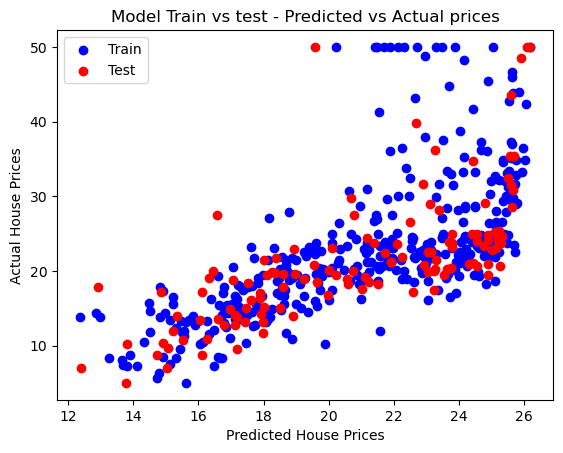

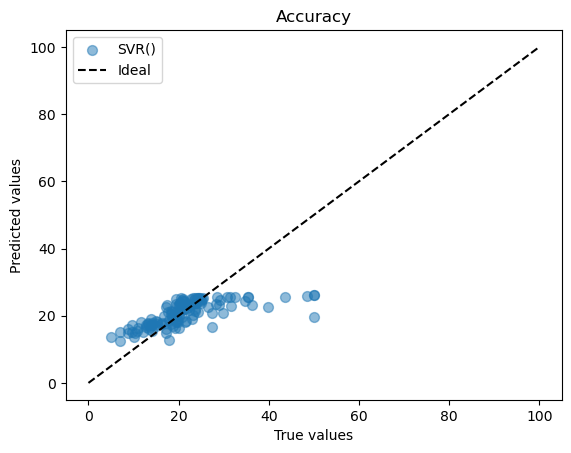

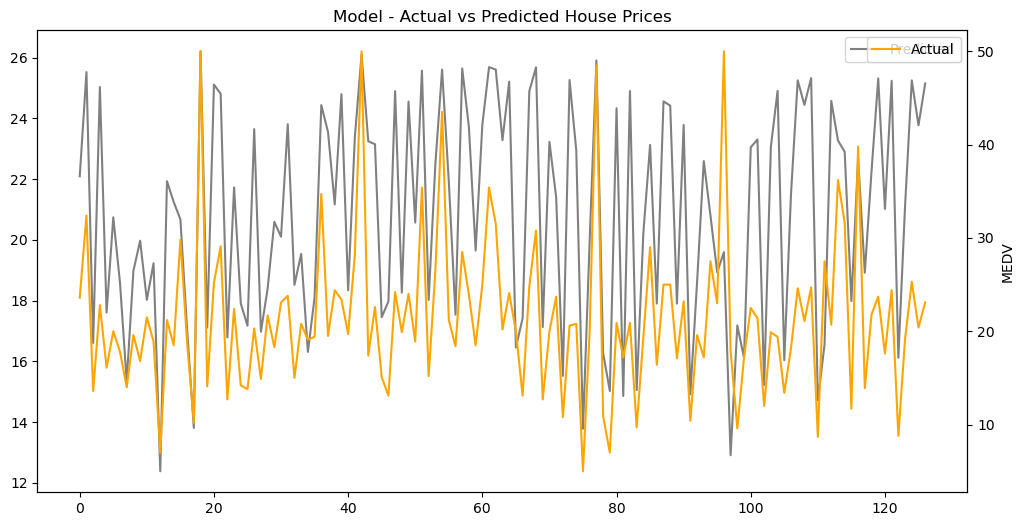

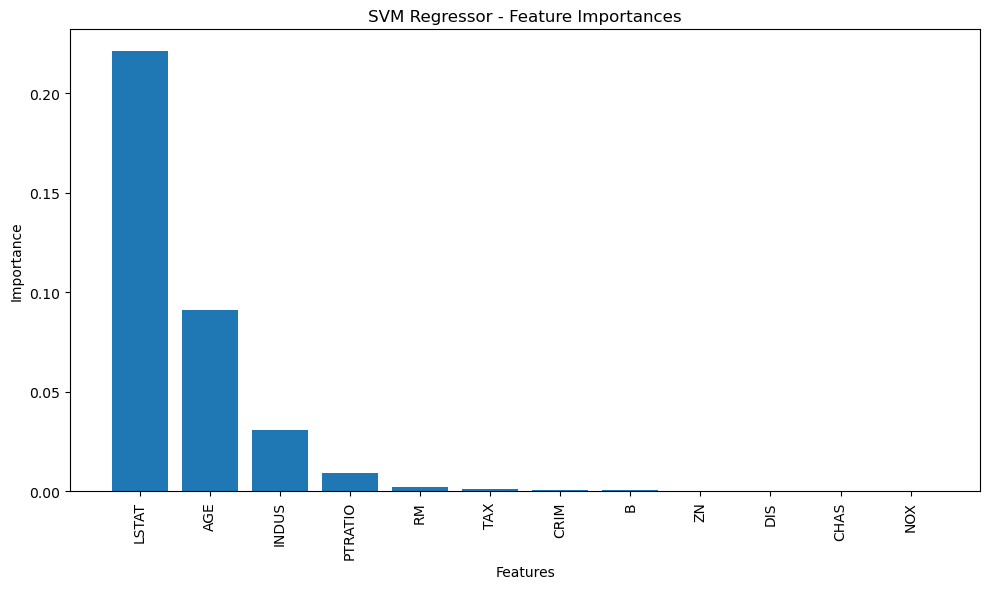

In [37]:
#Support Vector Machine (SVM) Regressor

from sklearn import svm
from sklearn.inspection import permutation_importance

model = svm.SVR(kernel='rbf')
train (model, X, y)

# Compute permutation importances
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances
importances = perm_importance.importances_mean

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
importances_sorted = importances[sorted_indices]
feature_names_sorted = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_sorted)), importances_sorted)
plt.xticks(range(len(feature_names_sorted)), feature_names_sorted, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('SVM Regressor - Feature Importances')
plt.tight_layout()
plt.show()

Model report
MSE: 8.87541566585399
Cross Validation score: 19.133246166690572
Model R2 score on train data: 0.9786510025304921
Model R2 score on test data: 0.8732574941272704
MAPE: 0.10333834241158761


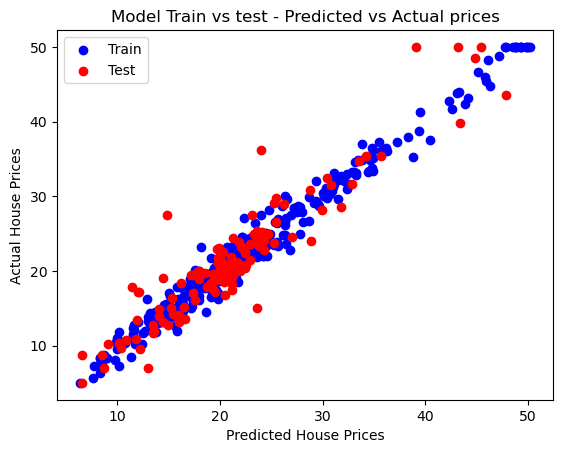

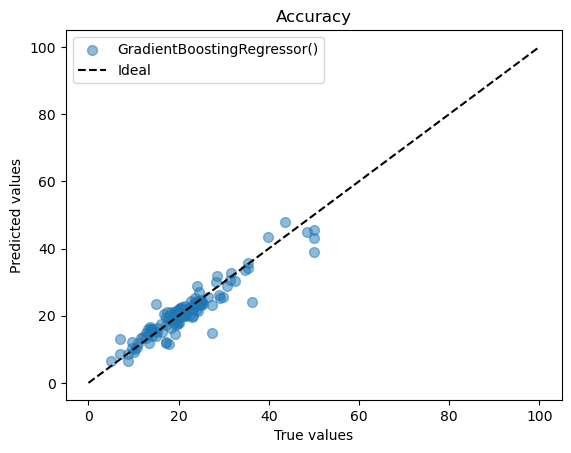

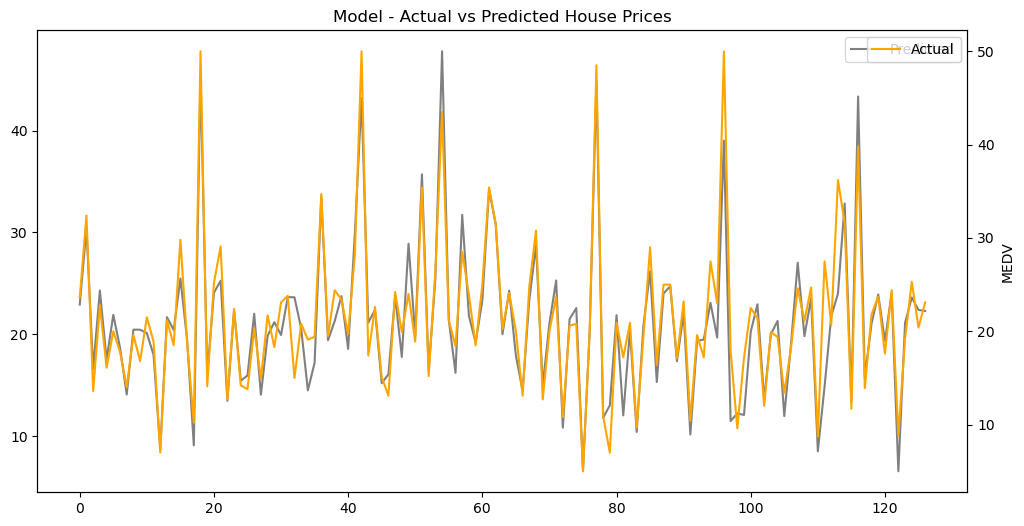

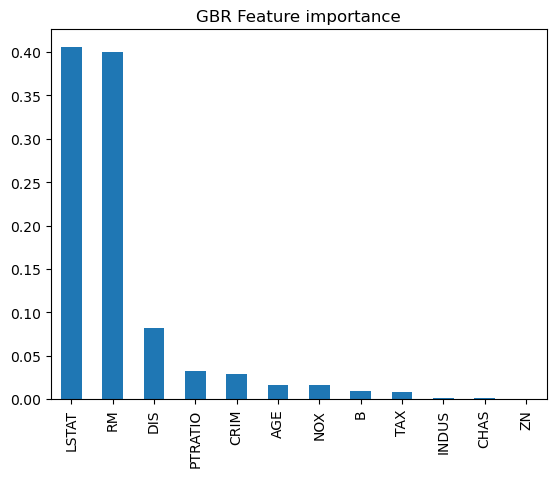

In [38]:
#Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
train (model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind = 'bar', title = 'GBR Feature importance')
plt.show()


Model report
MSE: 25.501949530729547
Cross Validation score: 34.60249004026995
Model R2 score on train data: 0.6681318010145676
Model R2 score on test data: 0.635827649109486
MAPE: 0.1790822838332288


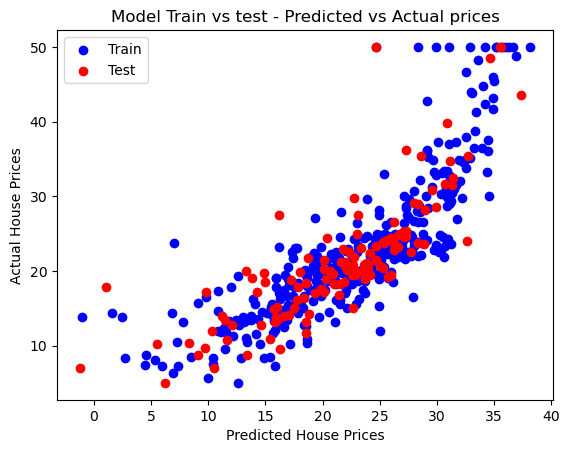

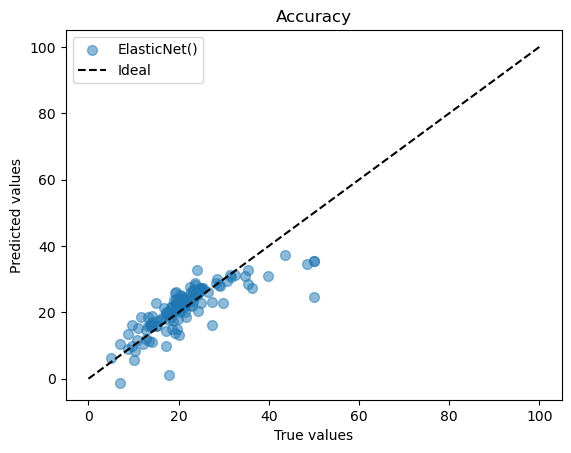

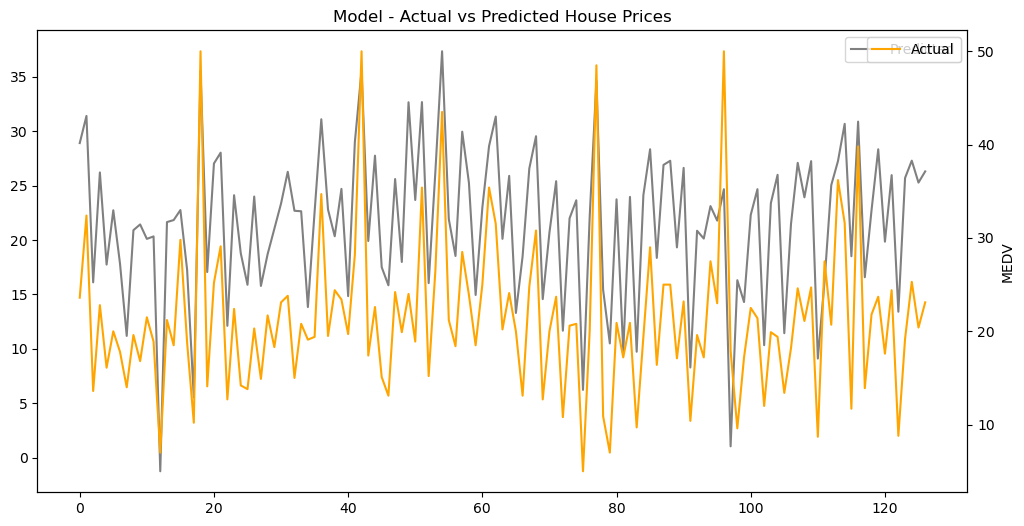

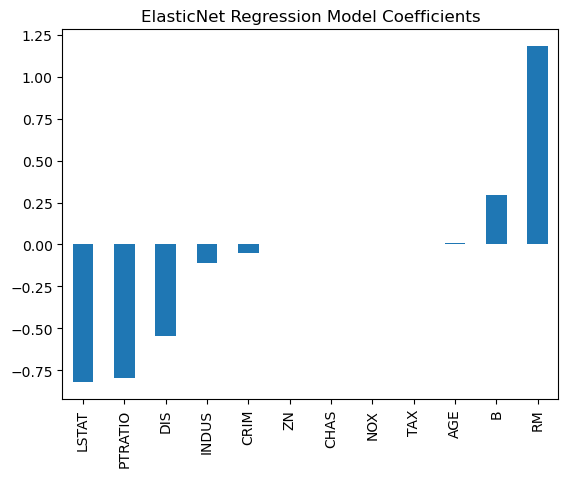

In [39]:
#ElasticNet Regression

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
train (model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'ElasticNet Regression Model Coefficients')
plt.show()

Model report
MSE: 24.30080667468975
Cross Validation score: 34.56517895674036
Model R2 score on train data: 0.7342526094968778
Model R2 score on test data: 0.6529801815898859
MAPE: 0.16958635124049035


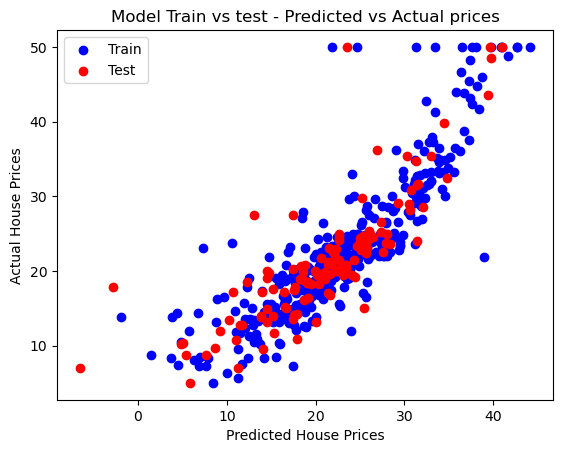

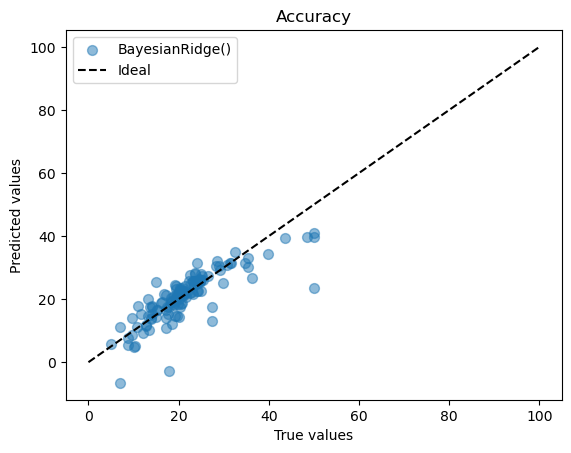

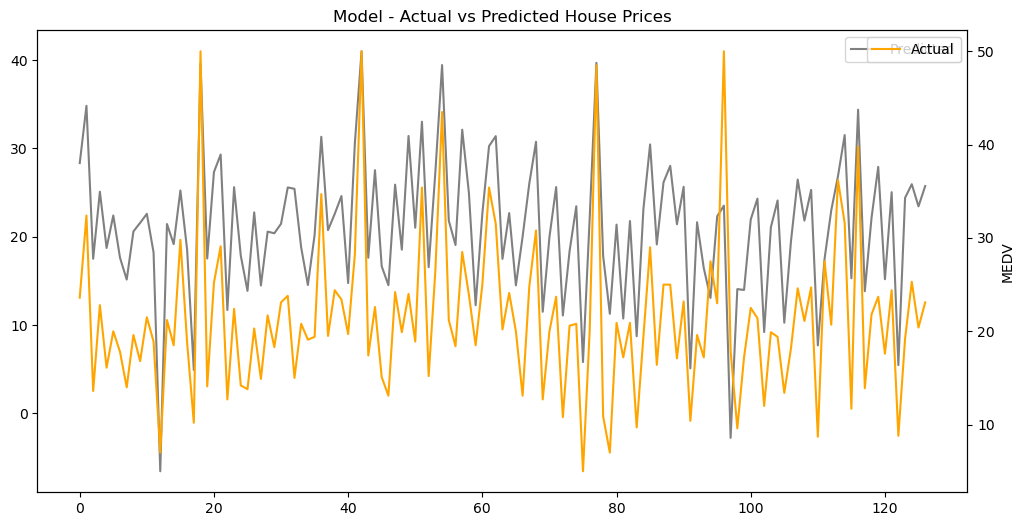

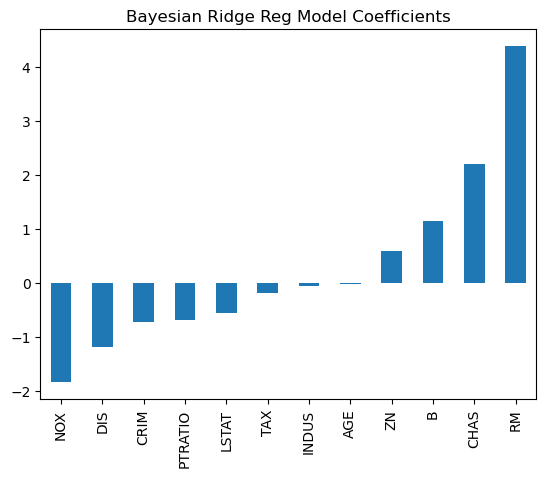

In [40]:
#Bayesian Ridge Regression

from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
train (model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Bayesian Ridge Reg Model Coefficients')
plt.show()

In [43]:
#KNN Regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Instantiate the KNNRegressor model
knn_reg = KNeighborsRegressor()

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [44]:
# Get the best parameter value
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(best_n_neighbors)

5


In [45]:
# Train the model with the best parameter
best_KNN_reg = KNeighborsRegressor(n_neighbors=5)
best_KNN_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [46]:
#KNN (with n_neighbors=5) Regression model: Evaluation on Train data

y_pred_knn_tr = best_KNN_reg.predict(X_train)

print("MSE",round(mean_squared_error(y_train,y_pred_knn_tr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_train,y_pred_knn_tr)), 3))
print("MAE",round(mean_absolute_error(y_train,y_pred_knn_tr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_train,y_pred_knn_tr), 3))
print("R2 Score : ", round(r2_score(y_train,y_pred_knn_tr), 3))

MSE 17.37
RMSE 4.168
MAE 2.882
MAPE 0.134
R2 Score :  0.802


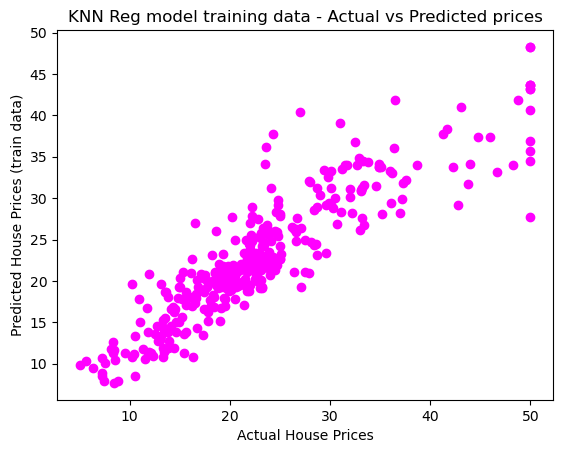

In [47]:
plt.scatter(y_train, y_pred_knn_tr, color='magenta')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (train data)")
plt.title("KNN Reg model training data - Actual vs Predicted prices")
plt.show()

In [48]:
#KNN (with n_neighbors=5) Regression model: Evaluation on Test data (predictions)

y_pred_knn = best_KNN_reg.predict(X_test)

print("MSE",round(mean_squared_error(y_test,y_pred_knn), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred_knn)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred_knn), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred_knn), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred_knn), 3))

MSE 26.793
RMSE 5.176
MAE 3.509
MAPE 0.166
R2 Score :  0.64


In [ ]:
plt.scatter(y_test, y_pred_knn, color='magenta')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (test data)")
plt.title("KNN Reg model testing data - Actual vs Predicted prices")
plt.show()

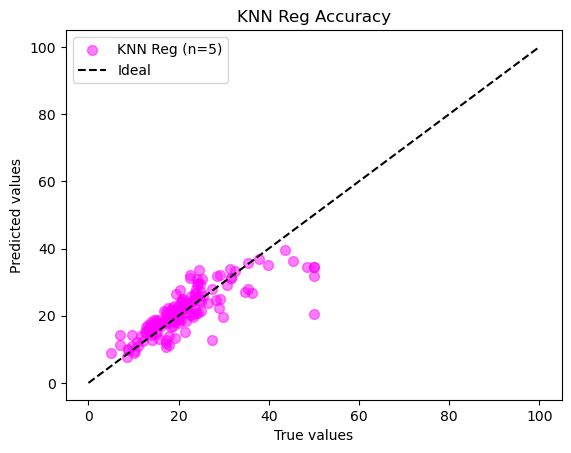

In [49]:
#Another visualization of our KNN Reg model predictions from the test set:

plt.scatter(y_test, y_pred_knn, label='KNN Reg (n=5)', alpha=0.5, s=50, color='magenta')
plt.plot([0, 100], [0, 100], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('KNN Reg Accuracy')
plt.legend()
plt.show()

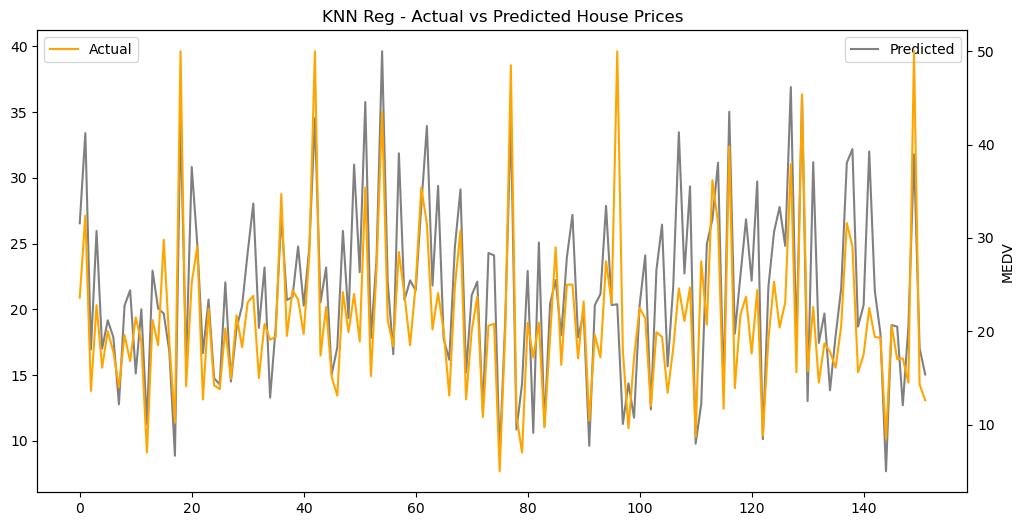

In [50]:
data_points = list(range(len(y_test)))

fig = plt.figure(figsize=(12, 6))
plt.title('KNN Reg - Actual vs Predicted House Prices')

fig = sns.lineplot(x=data_points, 
                   y=y_pred_knn, 
                   color="grey", 
                   legend='brief', 
                   label = "Predicted")
ax2 = plt.twinx()
fig = sns.lineplot(x=data_points, 
                   y=y_test, 
                   color="orange", 
                   legend='brief', 
                   label = "Actual",
                   ax=ax2)
plt.show()